In the highly competitive E-Commerce/DTH market, customer retention has become a major challenge. The company is experiencing significant account churn, which impacts multiple customers per account. This report presents a churn prediction model and data-driven campaign recommendations aimed at reducing churn while maintaining profitability. The proposed strategy ensures minimal financial risk while maximizing customer retention.

*   Customer churn leads to revenue loss and increased customer acquisition costs.






*   Each churned account can impact multiple customers.
* The company requires a predictive churn model to identify at-risk accounts before they leave.
* A targeted retention strategy must be implemented, ensuring cost-effectiveness while maximizing retention.




###**Variable**  ---------------------------**Description**


1.  **AccountID** --------------------------- account unique identifier
2.  **Churn**  ---------------------------------- account churn flag (Target)
3. **Tenure** -------------------------------- Tenure of account
4. **City_Tier** ----------------------------- Tier of primary customer's city
5. **CC_Contacted_LY** --------------- How many times all the customers of the account has contacted customer care in last 12months
6. **Payment** ------------------------------ Preferred Payment mode of the customers in the account
7. **Gender** -------------------------------- Gender of the primary customer of the account
8. **Service_Score** --------------------- Satisfaction score given by customers of the account on service provided by company
9. **Account_user_count** ------------ Number of customers tagged with this account
10. **CC_Agent_Score** ------------------ Satisfaction score given by customers of the account on customer care service provided by company
11. **account_segment** ---------------- Account segmentation on the basis of spend
12. **Marital_Status** --------------------- Marital status of the primary customer of the account
13. **rev_per_month** --------------------- Monthly average revenue generated by account in last 12 months
14. **Complain_ly** ------------------------- Any complaints has been raised by account in last 12 months
15. **rev_growth_yoy** -------------------- Revenue growth percentage of the account (last 12 months vs last 24 to 13
month)
16. **coupon_used_for_payment** -- How many times customers have used coupons to do the payment in last 12
months
17. **Day_Since_CC_connect** ------- Number of days since no customers in the account has contacted the customer
care
18. **cashback** ------------------------------ Monthly average cashback generated by account in last 12 months
19. **Login_device** ------------------------ Preferred login device of the customers in the account

                      












###**Upload Required Libraries and import the dataset**

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
import os
import matplotlib.style
plt.style.use('classic')
%matplotlib inline

In [8]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
df =pd.read_excel("/content/drive/MyDrive/Capstone_Project/Customer_Churn_Data.xlsx")

###**Information about the Data**

In [11]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [12]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

In [13]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  11260 
no. of columns:  19


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [15]:
df.isnull().sum().sort_values(ascending=False)

cashback                   471
Complain_ly                357
Day_Since_CC_connect       357
Login_device               221
Marital_Status             212
CC_Agent_Score             116
Account_user_count         112
City_Tier                  112
Payment                    109
Gender                     108
Tenure                     102
CC_Contacted_LY            102
rev_per_month              102
Service_Score               98
account_segment             97
Churn                        0
AccountID                    0
rev_growth_yoy               0
coupon_used_for_payment      0
dtype: int64

###**Treating Duplicates**

In [16]:
df=df.drop('AccountID', axis=1) #Dropping the 'AccountID' column

In [17]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 259


In [18]:
df.drop_duplicates(inplace=True)

In [19]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


###**Checking each variable and treating them**

In [20]:
print("no. of rows: ",df.shape[0], "\n""no. of columns: ",df.shape[1])

no. of rows:  11001 
no. of columns:  18


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11001 non-null  int64  
 1   Tenure                   10899 non-null  object 
 2   City_Tier                10889 non-null  float64
 3   CC_Contacted_LY          10899 non-null  float64
 4   Payment                  10892 non-null  object 
 5   Gender                   10893 non-null  object 
 6   Service_Score            10903 non-null  float64
 7   Account_user_count       10889 non-null  object 
 8   account_segment          10904 non-null  object 
 9   CC_Agent_Score           10885 non-null  float64
 10  Marital_Status           10790 non-null  object 
 11  rev_per_month            10899 non-null  object 
 12  Complain_ly              10644 non-null  float64
 13  rev_growth_yoy           11001 non-null  object 
 14  coupon_used_for_payment  11

In [22]:
df["Churn"].value_counts()

Churn
0    9149
1    1852
Name: count, dtype: int64

In [23]:
df["Tenure"].value_counts()

Tenure
1     1322
0     1198
8      510
9      485
7      432
10     412
3      399
5      394
4      393
11     376
6      358
12     349
13     349
2      345
14     338
15     303
16     283
19     267
18     247
17     212
20     211
23     166
21     164
22     148
24     144
30     136
28     133
99     131
27     130
26     121
#      116
29     112
25     112
31      95
50       2
60       2
51       2
61       2
Name: count, dtype: int64

In [24]:
df['Tenure'] = df['Tenure'].replace({"#":1}) #Replacing the 116 # with the maximum tenure value

<ipython-input-24-567a5efb7459>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Tenure'] = df['Tenure'].replace({"#":1}) #Replacing the 116 # with the maximum tenure value


In [25]:
df["Tenure"].value_counts()

Tenure
1.0     1438
0.0     1198
8.0      510
9.0      485
7.0      432
10.0     412
3.0      399
5.0      394
4.0      393
11.0     376
6.0      358
12.0     349
13.0     349
2.0      345
14.0     338
15.0     303
16.0     283
19.0     267
18.0     247
17.0     212
20.0     211
23.0     166
21.0     164
22.0     148
24.0     144
30.0     136
28.0     133
99.0     131
27.0     130
26.0     121
29.0     112
25.0     112
31.0      95
50.0       2
60.0       2
51.0       2
61.0       2
Name: count, dtype: int64

In [26]:
df['City_Tier'].value_counts()

City_Tier
1.0    7097
3.0    3336
2.0     456
Name: count, dtype: int64

In [27]:
df['CC_Contacted_LY'].value_counts()

CC_Contacted_LY
14.0     663
13.0     644
16.0     644
9.0      625
15.0     607
12.0     560
8.0      524
17.0     513
11.0     505
10.0     475
7.0      388
18.0     372
19.0     360
20.0     315
21.0     306
6.0      305
22.0     277
23.0     235
24.0     208
25.0     193
32.0     188
29.0     177
34.0     174
28.0     172
30.0     170
27.0     168
26.0     164
35.0     161
31.0     160
33.0     151
36.0     145
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
43.0       8
5.0        8
4.0        1
127.0      1
126.0      1
132.0      1
129.0      1
Name: count, dtype: int64

In [28]:
df['Payment'].value_counts()

Payment
Debit Card          4484
Credit Card         3441
E wallet            1195
Cash on Delivery     977
UPI                  795
Name: count, dtype: int64

In [29]:
df['Gender'].value_counts()

Gender
Male      6172
Female    4075
M          376
F          270
Name: count, dtype: int64

In [30]:
df['Gender'] = df['Gender'].replace({"M" :"Male", "F":"Female"})

In [31]:
df['Gender'].value_counts()

Gender
Male      6548
Female    4345
Name: count, dtype: int64

In [32]:
df['Service_Score'].value_counts()

Service_Score
3.0    5360
2.0    3183
4.0    2270
1.0      77
0.0       8
5.0       5
Name: count, dtype: int64

In [33]:
df['Account_user_count'].value_counts()

Account_user_count
4    4454
3    3181
5    1665
2     517
1     435
@     332
6     305
Name: count, dtype: int64

In [34]:
df['Account_user_count'] =df['Account_user_count'].replace({"@":7}) #Assuming these 332 entries belong to a different section

<ipython-input-34-98c658695e38>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Account_user_count'] =df['Account_user_count'].replace({"@":7}) #Assuming these 332 entries belong to a different section


In [35]:
df['Account_user_count'].value_counts()

Account_user_count
4.0    4454
3.0    3181
5.0    1665
2.0     517
1.0     435
7.0     332
6.0     305
Name: count, dtype: int64

In [36]:
df['account_segment'].value_counts()

account_segment
Super           3961
Regular Plus    3752
HNI             1615
Super Plus       756
Regular          511
Regular +        262
Super +           47
Name: count, dtype: int64

In [37]:
df['account_segment'] = df['account_segment'].replace({"Regular +" : "Regular Plus" , "Super +" : "Super Plus"})

In [38]:
df['account_segment'].value_counts()

account_segment
Regular Plus    4014
Super           3961
HNI             1615
Super Plus       803
Regular          511
Name: count, dtype: int64

In [39]:
df['CC_Agent_Score'].value_counts()

CC_Agent_Score
3.0    3270
1.0    2261
5.0    2126
4.0    2064
2.0    1164
Name: count, dtype: int64

In [40]:
df['Marital_Status'].value_counts()

Marital_Status
Married     5710
Single      3412
Divorced    1668
Name: count, dtype: int64

In [41]:
df['rev_per_month'].value_counts()

rev_per_month
3      1690
2      1524
5      1307
4      1191
6      1071
7       745
+       689
8       627
9       552
10      400
1       389
11      270
12      166
13       93
14       48
15       24
102       8
124       5
123       5
107       5
133       4
140       4
129       4
118       4
136       4
127       3
138       3
115       3
116       3
126       3
117       3
101       3
137       3
113       3
108       3
130       3
119       3
110       3
114       2
139       2
19        2
134       2
120       2
131       2
105       2
121       2
22        2
125       2
21        1
20        1
122       1
23        1
104       1
25        1
135       1
111       1
109       1
100       1
103       1
Name: count, dtype: int64

In [42]:
df['rev_per_month']=df['rev_per_month'].replace({"+":3})

<ipython-input-42-b818b70ad81a>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_per_month']=df['rev_per_month'].replace({"+":3})


In [43]:
df['rev_per_month'].value_counts()

rev_per_month
3.0      2379
2.0      1524
5.0      1307
4.0      1191
6.0      1071
7.0       745
8.0       627
9.0       552
10.0      400
1.0       389
11.0      270
12.0      166
13.0       93
14.0       48
15.0       24
102.0       8
124.0       5
123.0       5
107.0       5
133.0       4
140.0       4
129.0       4
118.0       4
136.0       4
127.0       3
138.0       3
115.0       3
116.0       3
126.0       3
117.0       3
101.0       3
137.0       3
113.0       3
108.0       3
130.0       3
119.0       3
110.0       3
114.0       2
139.0       2
19.0        2
134.0       2
120.0       2
131.0       2
105.0       2
121.0       2
22.0        2
125.0       2
21.0        1
20.0        1
122.0       1
23.0        1
104.0       1
25.0        1
135.0       1
111.0       1
109.0       1
100.0       1
103.0       1
Name: count, dtype: int64

In [44]:
df['Complain_ly'].value_counts()

Complain_ly
0.0    7602
1.0    3042
Name: count, dtype: int64

In [45]:
df['rev_growth_yoy'].value_counts()

rev_growth_yoy
14    1486
13    1402
15    1250
12    1172
16     933
18     696
17     689
19     604
20     549
11     501
21     423
22     394
23     340
24     225
25     186
26      96
27      35
28      14
4        3
$        3
Name: count, dtype: int64

In [46]:
df['rev_growth_yoy'] =df['rev_growth_yoy'].replace({"$":14})

<ipython-input-46-1d11d658bc16>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['rev_growth_yoy'] =df['rev_growth_yoy'].replace({"$":14})


In [47]:
df['rev_growth_yoy'].value_counts()

rev_growth_yoy
14    1489
13    1402
15    1250
12    1172
16     933
18     696
17     689
19     604
20     549
11     501
21     423
22     394
23     340
24     225
25     186
26      96
27      35
28      14
4        3
Name: count, dtype: int64

In [48]:
df['coupon_used_for_payment'].value_counts()

coupon_used_for_payment
1     4258
2     2593
0     2090
3      691
4      419
5      280
6      232
7      183
8       88
10      34
9       34
11      30
12      26
13      21
14      11
15       4
16       4
#        1
$        1
*        1
Name: count, dtype: int64

In [49]:
df['coupon_used_for_payment'] =df['coupon_used_for_payment'].replace({"#":1,"$":1,"*":1})

<ipython-input-49-89addf60ad13>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['coupon_used_for_payment'] =df['coupon_used_for_payment'].replace({"#":1,"$":1,"*":1})


In [50]:
df['coupon_used_for_payment'].value_counts()

coupon_used_for_payment
1     4261
2     2593
0     2090
3      691
4      419
5      280
6      232
7      183
8       88
9       34
10      34
11      30
12      26
13      21
14      11
15       4
16       4
Name: count, dtype: int64

In [51]:
df['Day_Since_CC_connect'].value_counts()

Day_Since_CC_connect
3     1782
2     1537
1     1219
8     1150
0      927
7      896
4      868
9      606
5      464
10     332
6      225
11     178
12     145
13     113
14      73
15      36
17      34
18      26
16      25
30       2
47       2
31       2
$        1
46       1
Name: count, dtype: int64

In [52]:
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace({"$":3})

<ipython-input-52-eccb053fbc66>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace({"$":3})


In [53]:
df['Day_Since_CC_connect'].value_counts()

Day_Since_CC_connect
3.0     1783
2.0     1537
1.0     1219
8.0     1150
0.0      927
7.0      896
4.0      868
9.0      606
5.0      464
10.0     332
6.0      225
11.0     178
12.0     145
13.0     113
14.0      73
15.0      36
17.0      34
18.0      26
16.0      25
30.0       2
31.0       2
47.0       2
46.0       1
Name: count, dtype: int64

In [54]:
df['cashback'] = df['cashback'].replace({"$":155.62})

<ipython-input-54-f5c1279a62a0>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cashback'] = df['cashback'].replace({"$":155.62})


In [55]:
df['cashback'].value_counts()

cashback
155.62    12
149.36     9
123.42     8
128.19     8
148.42     8
          ..
242.31     1
171.32     1
177.98     1
158.60     1
251.57     1
Name: count, Length: 5692, dtype: int64

In [56]:
df['Login_device'].value_counts()

Login_device
Mobile      7308
Computer    2933
&&&&         539
Name: count, dtype: int64

In [57]:
df['Login_device'] = df['Login_device'].replace({"&&&&":"Others"})

In [58]:
df['Login_device'].value_counts()

Login_device
Mobile      7308
Computer    2933
Others       539
Name: count, dtype: int64

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11001 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11001 non-null  int64  
 1   Tenure                   10899 non-null  float64
 2   City_Tier                10889 non-null  float64
 3   CC_Contacted_LY          10899 non-null  float64
 4   Payment                  10892 non-null  object 
 5   Gender                   10893 non-null  object 
 6   Service_Score            10903 non-null  float64
 7   Account_user_count       10889 non-null  float64
 8   account_segment          10904 non-null  object 
 9   CC_Agent_Score           10885 non-null  float64
 10  Marital_Status           10790 non-null  object 
 11  rev_per_month            10899 non-null  float64
 12  Complain_ly              10644 non-null  float64
 13  rev_growth_yoy           11001 non-null  int64  
 14  coupon_used_for_payment  11

###**Checking missing values**

In [60]:
df.isnull().sum().sort_values(ascending=False)

cashback                   471
Complain_ly                357
Day_Since_CC_connect       357
Login_device               221
Marital_Status             211
CC_Agent_Score             116
Account_user_count         112
City_Tier                  112
Payment                    109
Gender                     108
CC_Contacted_LY            102
Tenure                     102
rev_per_month              102
Service_Score               98
account_segment             97
Churn                        0
rev_growth_yoy               0
coupon_used_for_payment      0
dtype: int64

In [61]:
df['Churn'].value_counts()

Churn
0    9149
1    1852
Name: count, dtype: int64

In [62]:
df_cleaned = df.dropna()

In [63]:
df_cleaned.head()

Churn  Tenure  City_Tier  CC_Contacted_LY           Payment  Gender  \
0      1     4.0        3.0              6.0        Debit Card  Female   
1      1     0.0        1.0              8.0               UPI    Male   
3      1     0.0        3.0             15.0        Debit Card    Male   
4      1     0.0        1.0             12.0       Credit Card    Male   
6      1     2.0        3.0             11.0  Cash on Delivery    Male   

   Service_Score  Account_user_count account_segment  CC_Agent_Score  \
0            3.0                 3.0           Super             2.0   
1            3.0                 4.0    Regular Plus             3.0   
3            2.0                 4.0           Super             5.0   
4            2.0                 3.0    Regular Plus             5.0   
6            2.0                 3.0           Super             2.0   

  Marital_Status  rev_per_month  Complain_ly  rev_growth_yoy  \
0         Single            9.0          1.0              11   
1         Single            7.0          1.0              15   
3         Single            8.0          0.0              23   
4         Single            3.0          0.0              11   
6       Divorced            4.0          0.0              14   

   coupon_used_for_payment  Day_Since_CC_connect  cashback Login_device  
0                        1                   5.0    159.93       Mobile  
1                        0                   0.0    120.90       Mobile  
3                        0                   3.0    134.07       Mobile  
4                        1                   3.0    129.60       Mobile  
6                        0                   0.0    120.86       Mobile

In [64]:
print("no. of rows: ",df_cleaned.shape[0], "\n""no. of columns: ",df_cleaned.shape[1])

no. of rows:  8447 
no. of columns:  18


In [65]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    8447 non-null   int64  
 1   Tenure                   8447 non-null   float64
 2   City_Tier                8447 non-null   float64
 3   CC_Contacted_LY          8447 non-null   float64
 4   Payment                  8447 non-null   object 
 5   Gender                   8447 non-null   object 
 6   Service_Score            8447 non-null   float64
 7   Account_user_count       8447 non-null   float64
 8   account_segment          8447 non-null   object 
 9   CC_Agent_Score           8447 non-null   float64
 10  Marital_Status           8447 non-null   object 
 11  rev_per_month            8447 non-null   float64
 12  Complain_ly              8447 non-null   float64
 13  rev_growth_yoy           8447 non-null   int64  
 14  coupon_used_for_payment  844

In [66]:
df_cleaned.describe().T

count        mean        std  min     25%     50%  \
Churn                    8447.0    0.166213   0.372294  0.0    0.00    0.00   
Tenure                   8447.0   11.316444  13.949807  0.0    2.00    9.00   
City_Tier                8447.0    1.656564   0.917293  1.0    1.00    1.00   
CC_Contacted_LY          8447.0   17.919025   8.929066  4.0   11.00   16.00   
Service_Score            8447.0    2.902451   0.727135  0.0    2.00    3.00   
Account_user_count       8447.0    3.823369   1.200406  1.0    3.00    4.00   
CC_Agent_Score           8447.0    3.047472   1.382974  1.0    2.00    3.00   
rev_per_month            8447.0    6.575589  13.167177  1.0    3.00    5.00   
Complain_ly              8447.0    0.283533   0.450739  0.0    0.00    0.00   
rev_growth_yoy           8447.0   16.205162   3.764174  4.0   13.00   15.00   
coupon_used_for_payment  8447.0    1.812715   2.005490  0.0    1.00    1.00   
Day_Since_CC_connect     8447.0    4.659642   3.706566  0.0    2.00    3.00   
cashback                 8447.0  179.384497  49.631708  0.0  147.15  165.11   

                             75%     max  
Churn                      0.000    1.00  
Tenure                    16.000   99.00  
City_Tier                  3.000    3.00  
CC_Contacted_LY           23.000  132.00  
Service_Score              3.000    5.00  
Account_user_count         4.000    7.00  
CC_Agent_Score             4.000    5.00  
rev_per_month              7.000  140.00  
Complain_ly                1.000    1.00  
rev_growth_yoy            19.000   28.00  
coupon_used_for_payment    2.000   16.00  
Day_Since_CC_connect       8.000   47.00  
cashback                 199.255  331.26

In [67]:
df_cleaned['Churn'].value_counts()

Churn
0    7043
1    1404
Name: count, dtype: int64

In [68]:
numerical_df = df_cleaned.select_dtypes(include=['int64', 'float64'])

In [69]:
numerical_df['Churn'].value_counts()

Churn
0    7043
1    1404
Name: count, dtype: int64

###**Univariate Analysis**

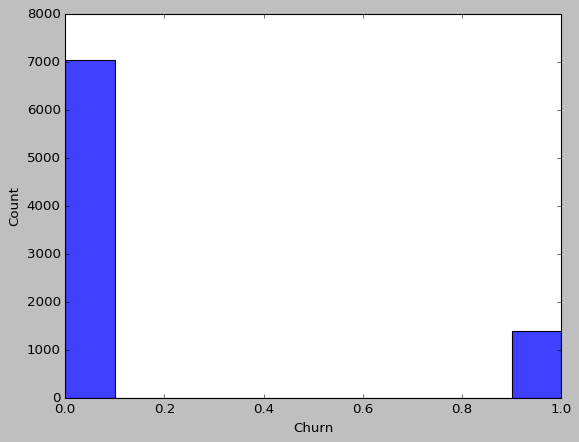

In [70]:
sns.histplot(df_cleaned['Churn'],bins=10);

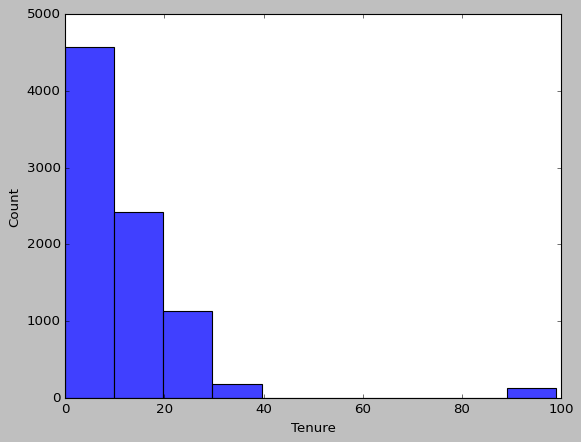

In [71]:
sns.histplot(df_cleaned['Tenure'],bins=10);

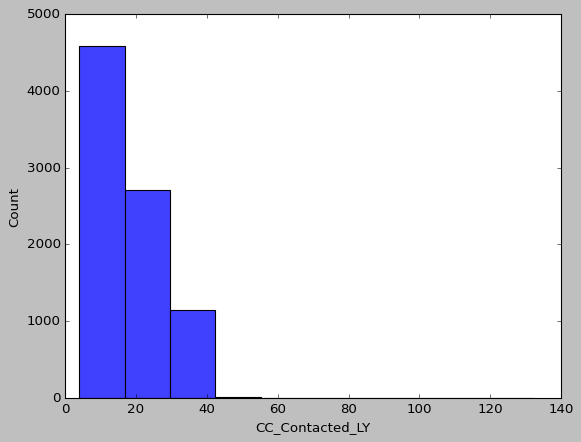

In [72]:
sns.histplot(df_cleaned['CC_Contacted_LY'],bins=10);

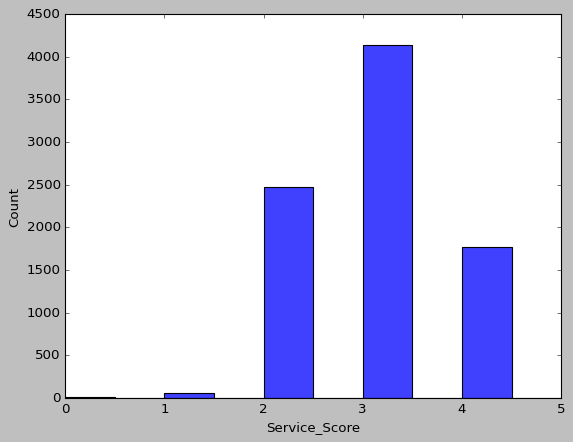

In [73]:
sns.histplot(df_cleaned['Service_Score'],bins=10);

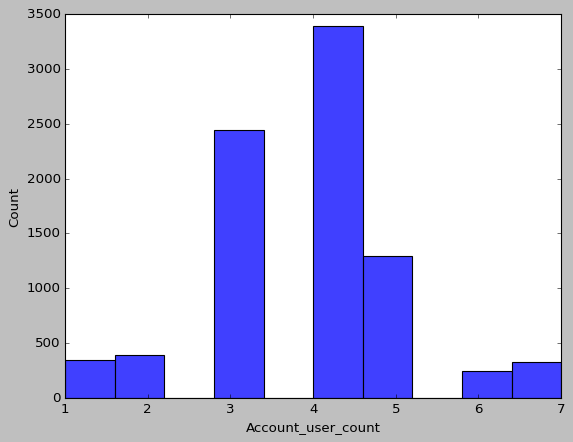

In [74]:
sns.histplot(df_cleaned['Account_user_count'],bins=10);

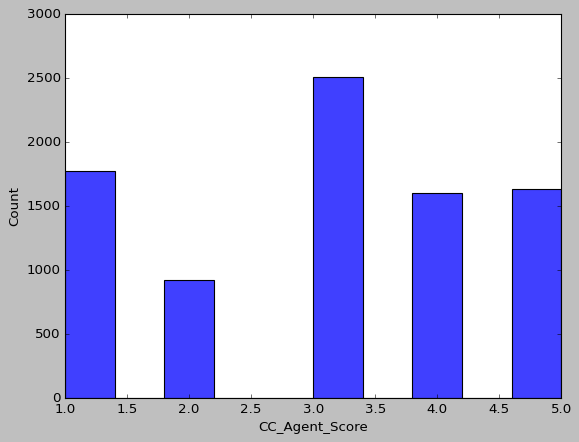

In [75]:
sns.histplot(df_cleaned['CC_Agent_Score'],bins=10);

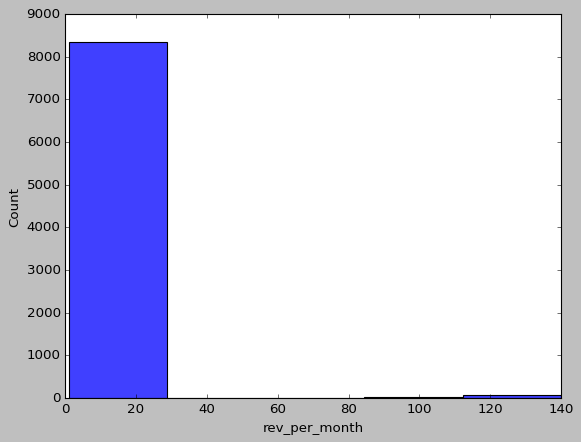

In [76]:
sns.histplot(df_cleaned['rev_per_month'],bins=5);

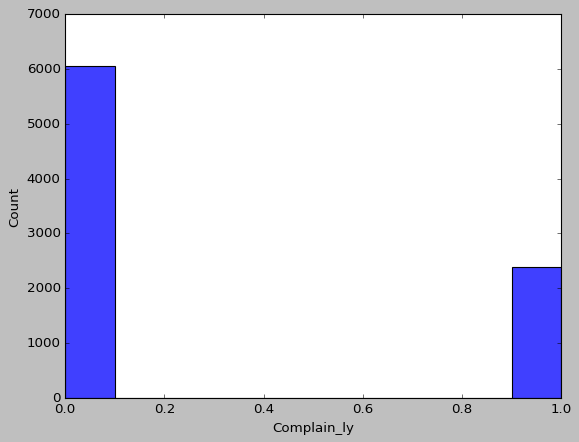

In [77]:
sns.histplot(df_cleaned['Complain_ly'],bins=10);

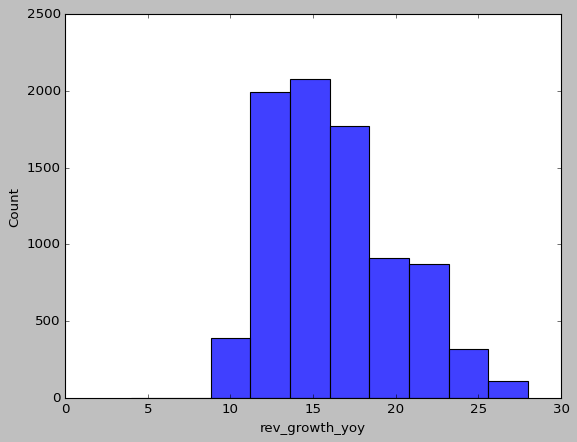

In [78]:
sns.histplot(df_cleaned['rev_growth_yoy'],bins=10);

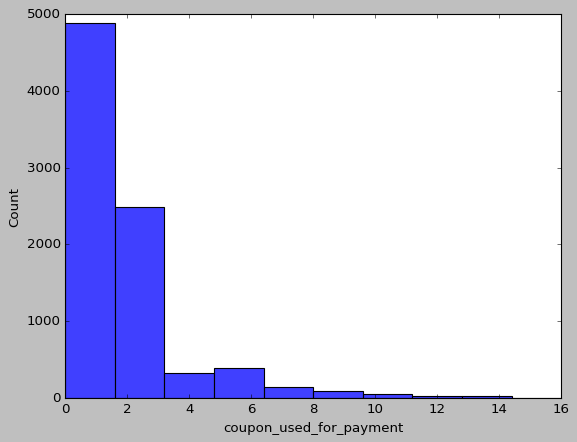

In [79]:
sns.histplot(df_cleaned['coupon_used_for_payment'],bins=10);

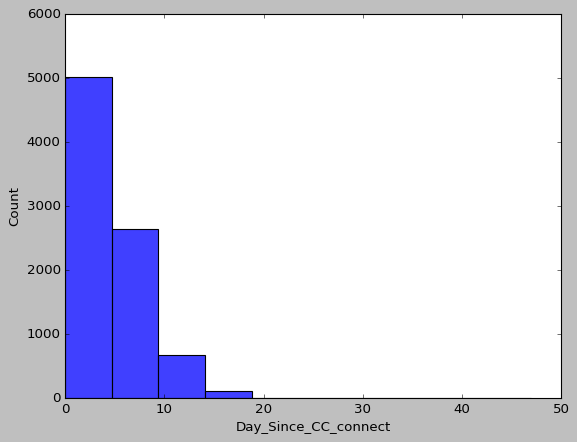

In [80]:
sns.histplot(df_cleaned['Day_Since_CC_connect'],bins=10);

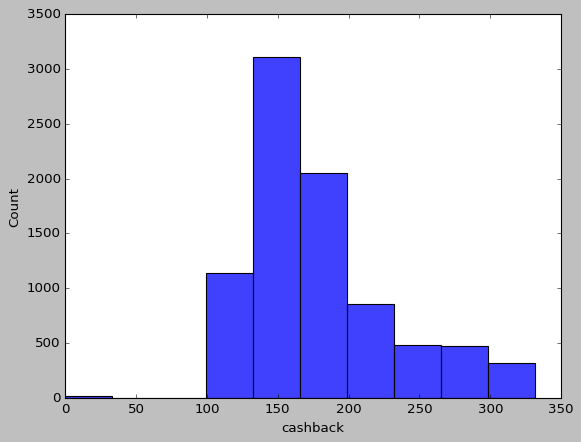

In [81]:
sns.histplot(df_cleaned['cashback'],bins=10);

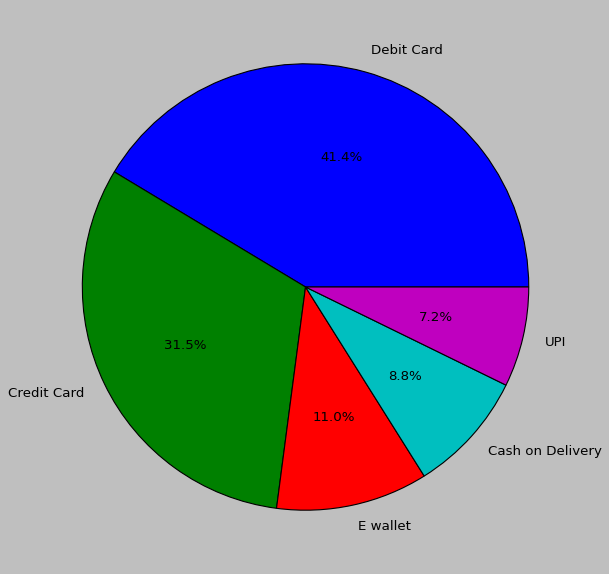

In [82]:
plt.figure(figsize=(9,9))
plt.pie(df_cleaned["Payment"].value_counts(),labels=df["Payment"].value_counts().index,autopct='%1.1f%%')
plt.show()

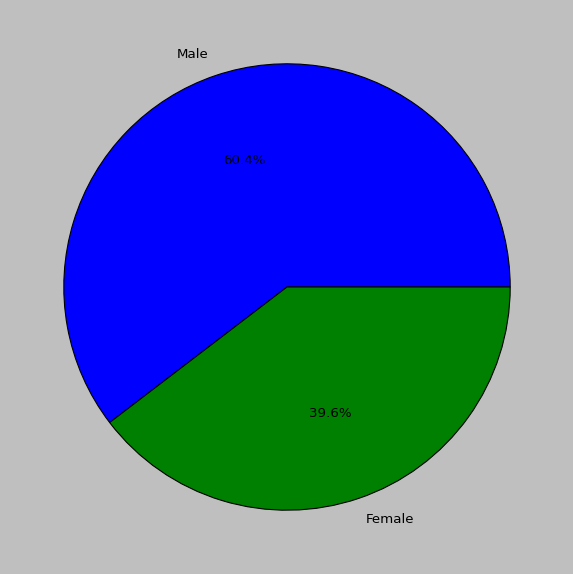

In [83]:
plt.figure(figsize=(9,9))
plt.pie(df_cleaned["Gender"].value_counts(),labels=df_cleaned["Gender"].value_counts().index,autopct='%1.1f%%')
plt.show()

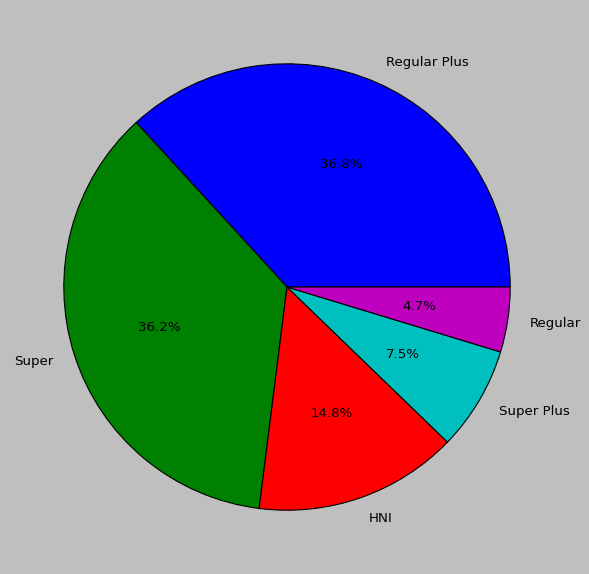

In [84]:
plt.figure(figsize=(9,9))
plt.pie(df_cleaned["account_segment"].value_counts(),labels=df_cleaned["account_segment"].value_counts().index,autopct='%1.1f%%')
plt.show()

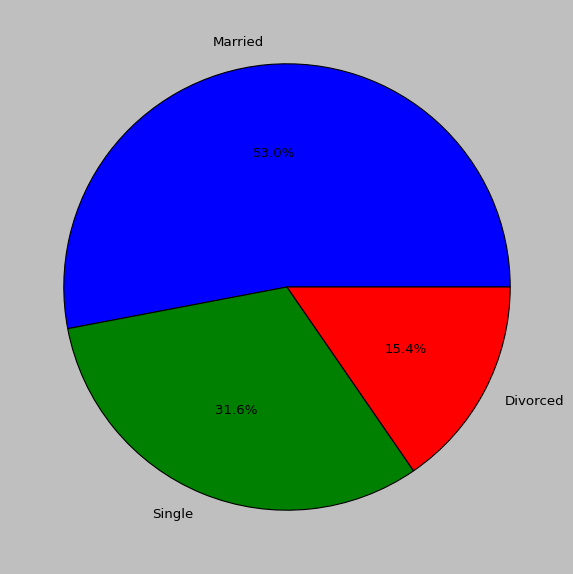

In [85]:
plt.figure(figsize=(9,9))
plt.pie(df_cleaned['Marital_Status'].value_counts(),labels=df_cleaned['Marital_Status'].value_counts().index,autopct='%1.1f%%')
plt.show()

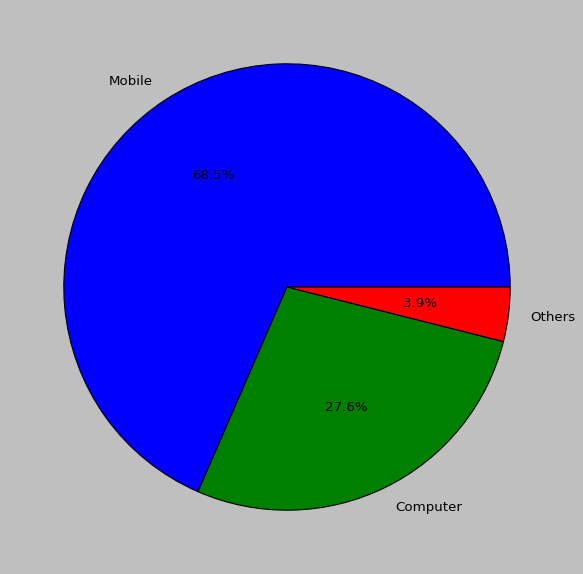

In [86]:
plt.figure(figsize=(9,9))
plt.pie(df_cleaned['Login_device'].value_counts(),labels=df_cleaned['Login_device'].value_counts().index,autopct='%1.1f%%')
plt.show()

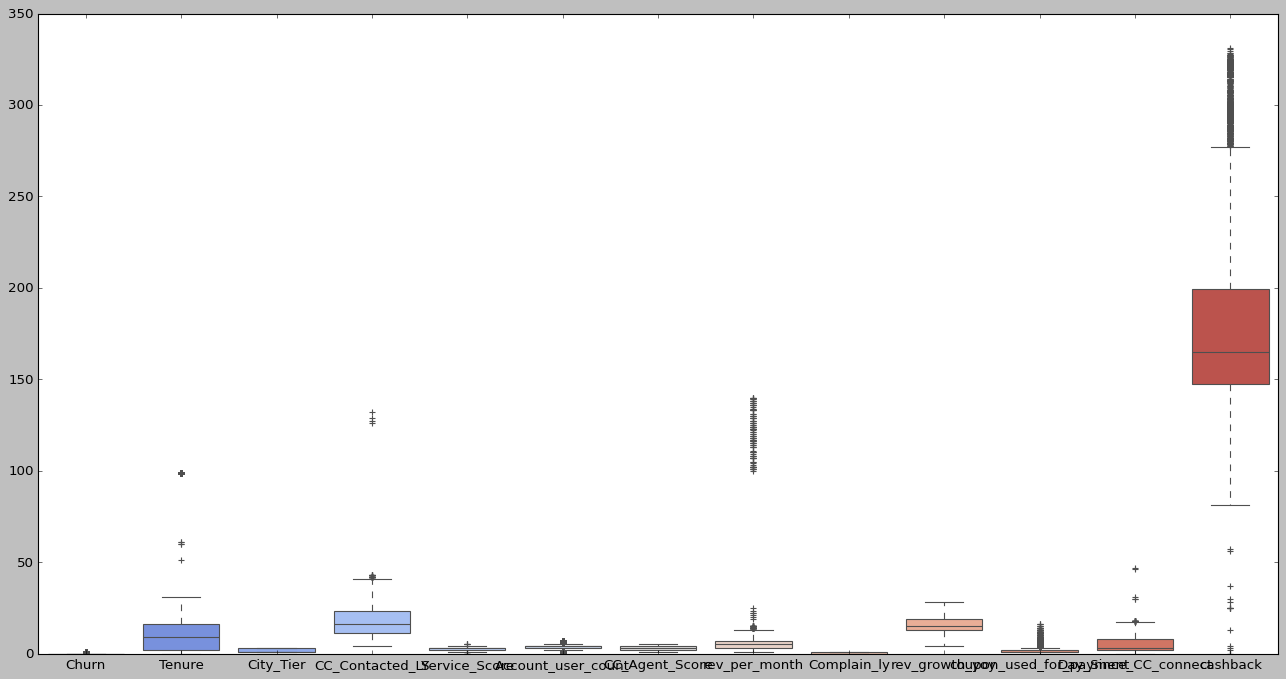

In [87]:
plt.figure(figsize=(20, 10))
sns.boxplot(data=numerical_df, palette="coolwarm")
plt.show()

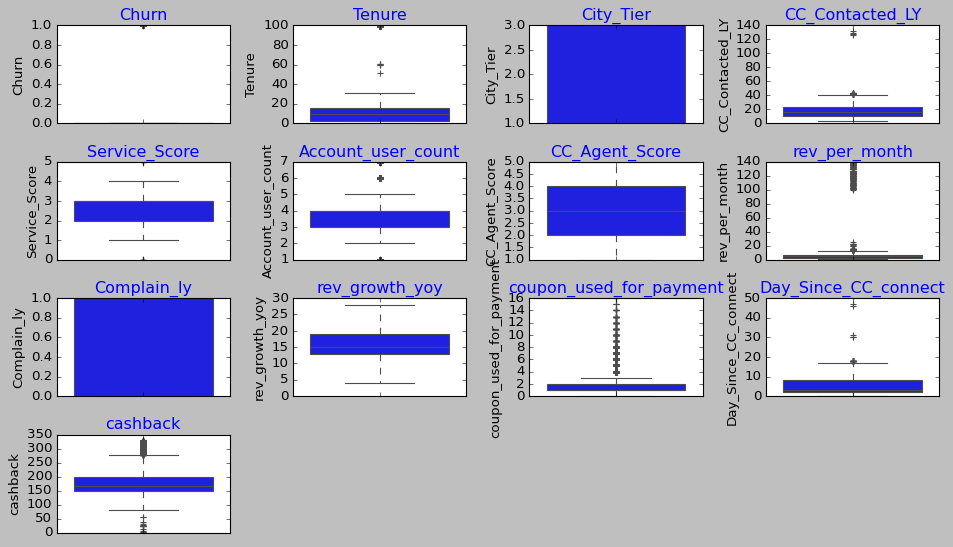

In [88]:
data_plot=numerical_df[numerical_df.dtypes[numerical_df.dtypes!='object'].index]
fig=plt.figure(figsize=(12,7))
for i in range(0,len(data_plot.columns)):
   ax=fig.add_subplot(4,4,(i+1))
   sns.boxplot(data_plot[data_plot.columns[i]])
   ax.set_title(data_plot.columns[i],color='Blue')
plt.tight_layout()

###**Bivariate Analysis**

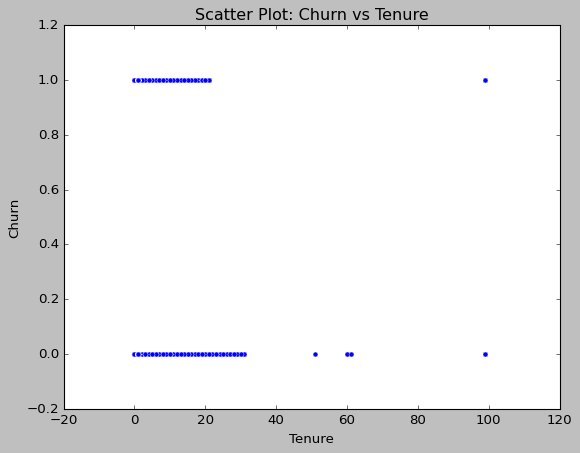

In [89]:
sns.scatterplot(x='Tenure', y='Churn', data=df_cleaned)
plt.title("Scatter Plot: Churn vs Tenure")
plt.show()

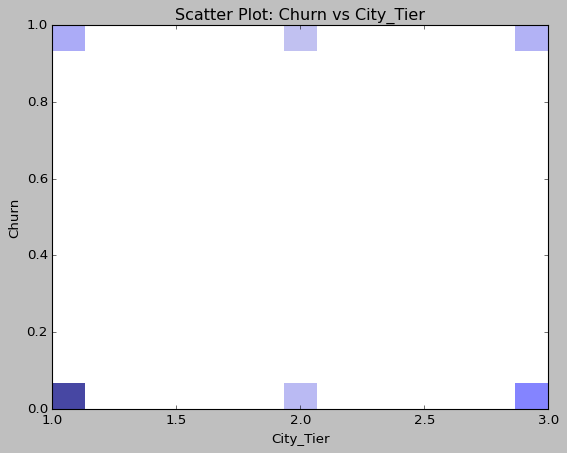

In [90]:
sns.histplot(x='City_Tier', y='Churn', data=df_cleaned)
plt.title("Scatter Plot: Churn vs City_Tier")
plt.show()

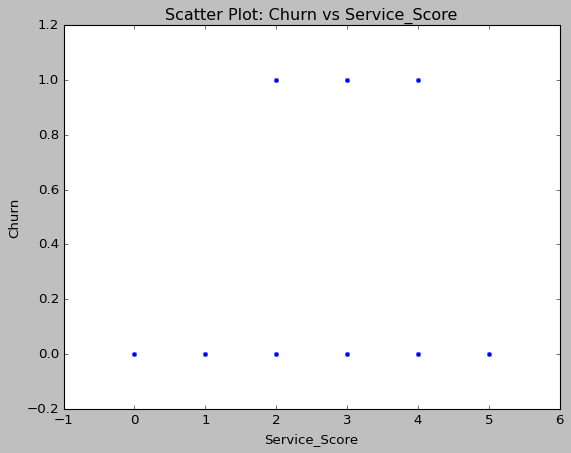

In [91]:
sns.scatterplot(x='Service_Score', y='Churn', data=df_cleaned)
plt.title("Scatter Plot: Churn vs Service_Score")
plt.show()

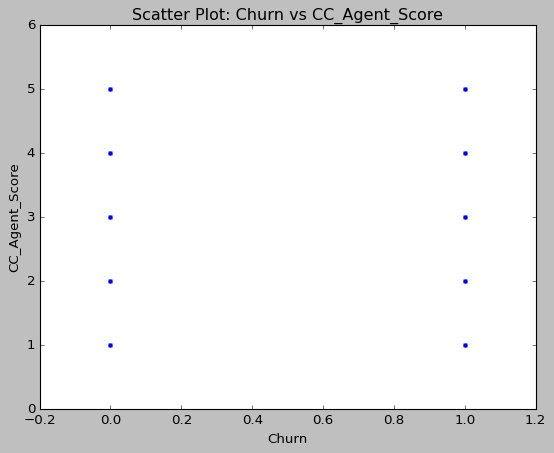

In [92]:
sns.scatterplot(x='Churn', y='CC_Agent_Score', data=df_cleaned)
plt.title("Scatter Plot: Churn vs CC_Agent_Score")
plt.show()

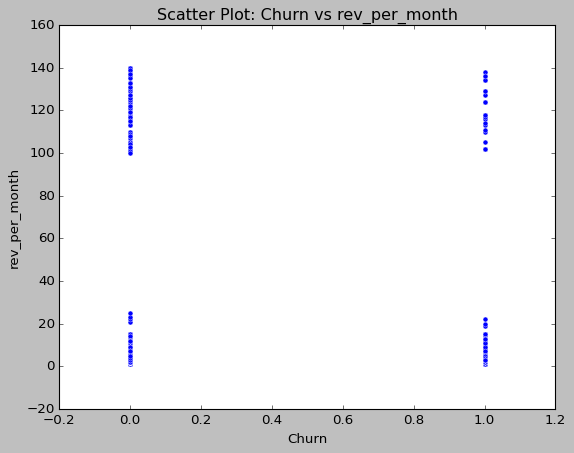

In [93]:
sns.scatterplot(x='Churn', y='rev_per_month', data=df_cleaned)
plt.title("Scatter Plot: Churn vs rev_per_month")
plt.show()

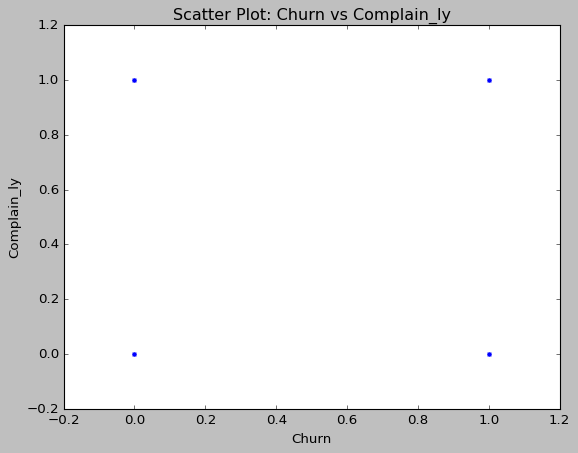

In [94]:
sns.scatterplot(x='Churn', y='Complain_ly', data=df_cleaned)
plt.title("Scatter Plot: Churn vs Complain_ly")
plt.show()

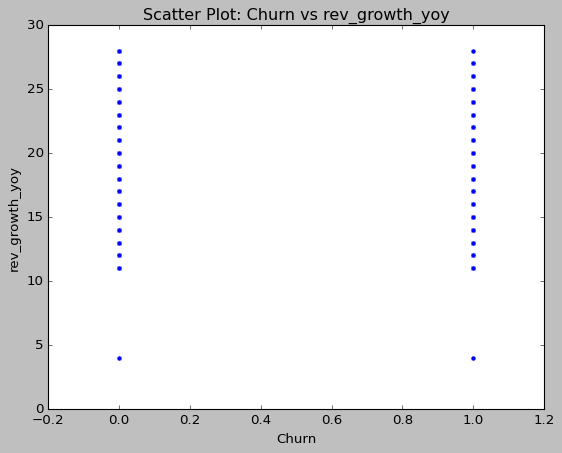

In [95]:
sns.scatterplot(x='Churn', y='rev_growth_yoy', data=df_cleaned)
plt.title("Scatter Plot: Churn vs rev_growth_yoy")
plt.show()

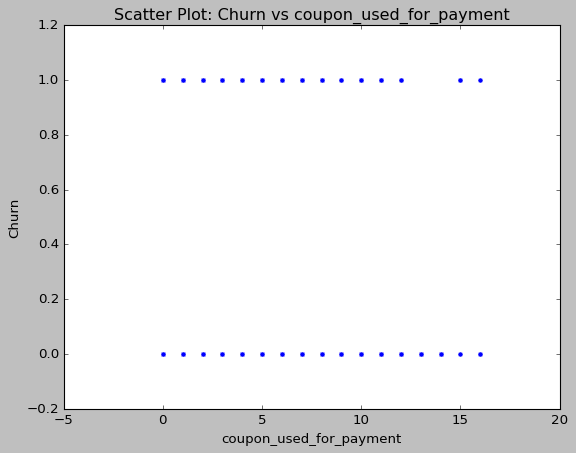

In [96]:
sns.scatterplot(x='coupon_used_for_payment', y='Churn', data=df_cleaned)
plt.title("Scatter Plot: Churn vs coupon_used_for_payment")
plt.show()

In [97]:
correlation = numerical_df.corr()
print(correlation)

                            Churn    Tenure  City_Tier  CC_Contacted_LY  \
Churn                    1.000000 -0.213099   0.093326         0.063743   
Tenure                  -0.213099  1.000000  -0.028388         0.000712   
City_Tier                0.093326 -0.028388   1.000000         0.014833   
CC_Contacted_LY          0.063743  0.000712   0.014833         1.000000   
Service_Score            0.003481  0.012300  -0.010827         0.054731   
Account_user_count       0.074708 -0.001102   0.020494         0.022790   
CC_Agent_Score           0.097583 -0.014219  -0.007866        -0.002613   
rev_per_month            0.023691  0.019755  -0.028077         0.011763   
Complain_ly              0.256064 -0.025795   0.007310         0.018267   
rev_growth_yoy          -0.022900  0.019102  -0.024512         0.070751   
coupon_used_for_payment -0.014756  0.080062   0.020575         0.004132   
Day_Since_CC_connect    -0.144758  0.113295   0.023249         0.012486   
cashback                -

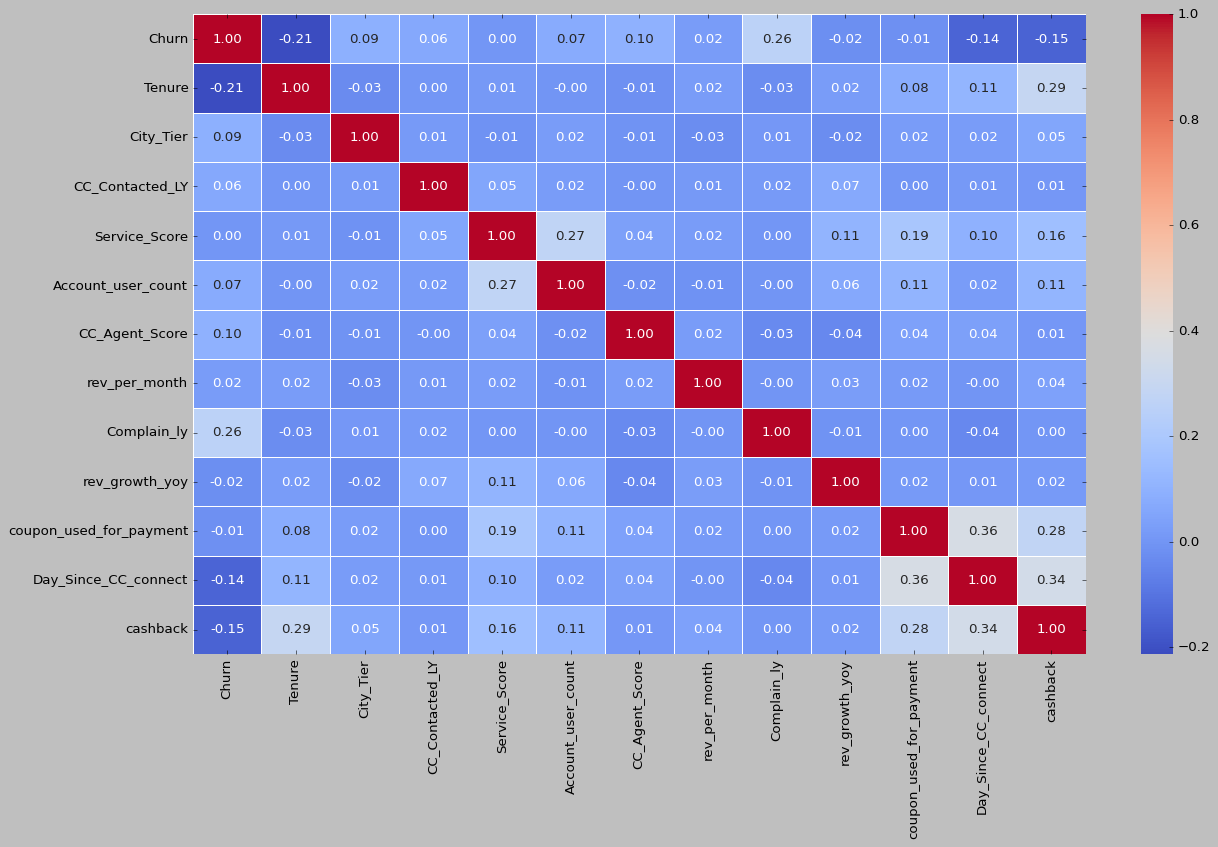

In [98]:
plt.figure(figsize=(18, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

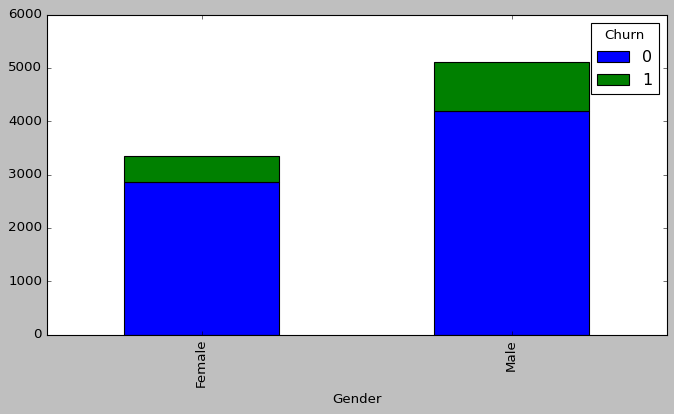

In [99]:
ct = pd.crosstab(df_cleaned['Gender'],df_cleaned['Churn'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

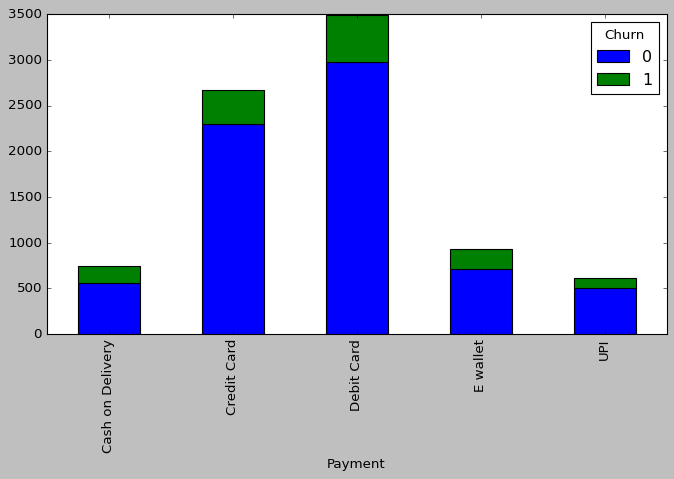

In [100]:
ct = pd.crosstab(df_cleaned['Payment'],df_cleaned['Churn'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

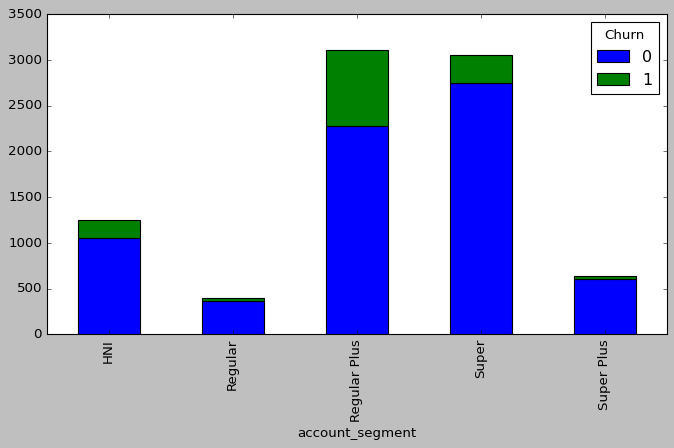

In [101]:
ct = pd.crosstab(df_cleaned['account_segment'],df_cleaned['Churn'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

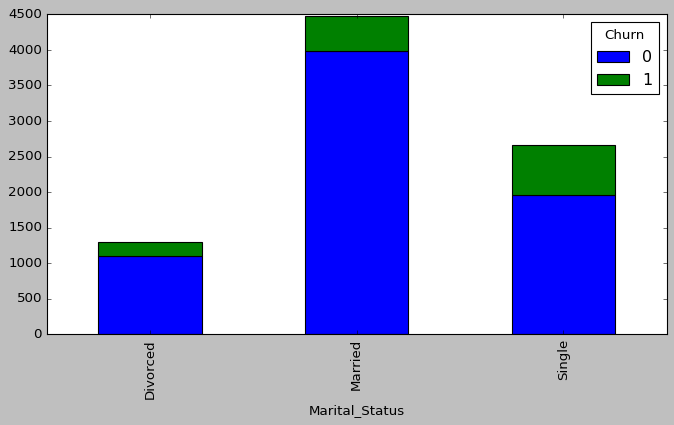

In [102]:
ct = pd.crosstab(df_cleaned['Marital_Status'],df_cleaned['Churn'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

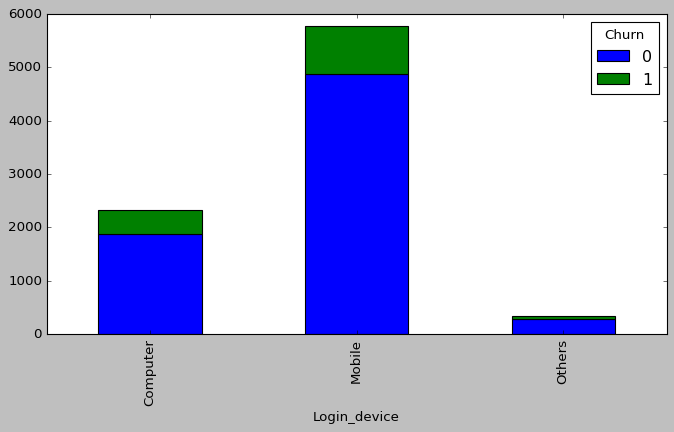

In [103]:
ct = pd.crosstab(df_cleaned['Login_device'],df_cleaned['Churn'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

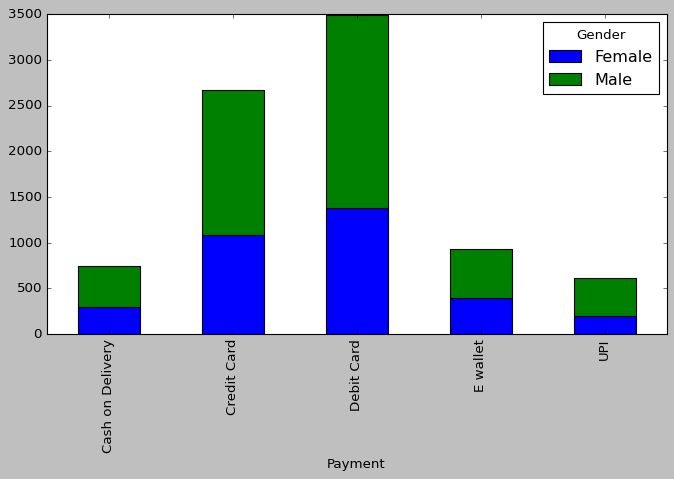

In [104]:
ct = pd.crosstab(df_cleaned['Payment'],df_cleaned['Gender'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

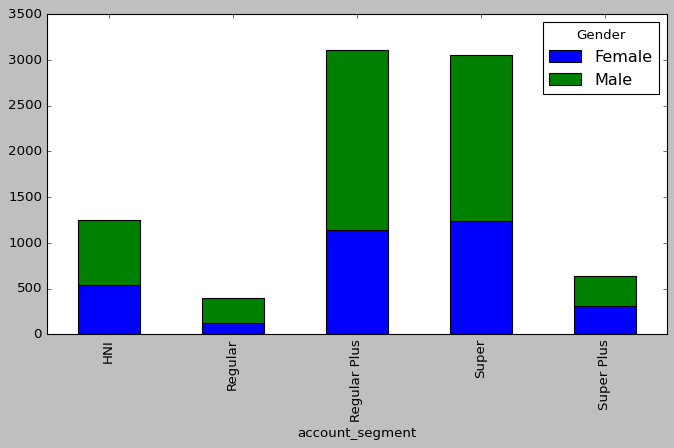

In [105]:
ct = pd.crosstab(df_cleaned['account_segment'],df_cleaned['Gender'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

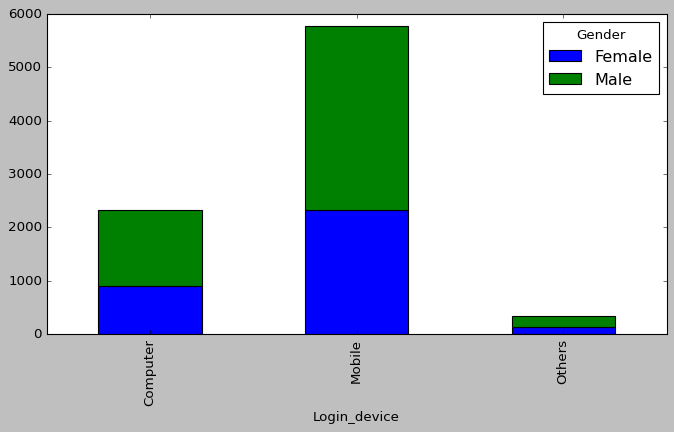

In [106]:
ct = pd.crosstab(df_cleaned['Login_device'],df_cleaned['Gender'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

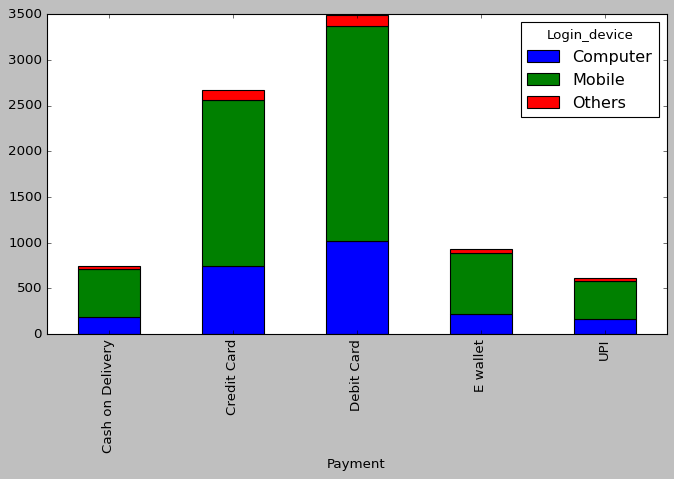

In [107]:
ct = pd.crosstab(df_cleaned['Payment'],df_cleaned['Login_device'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

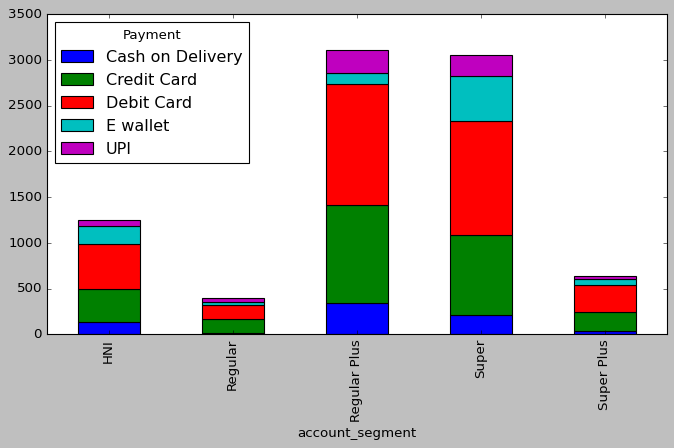

In [108]:
ct = pd.crosstab(df_cleaned['account_segment'],df_cleaned['Payment'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

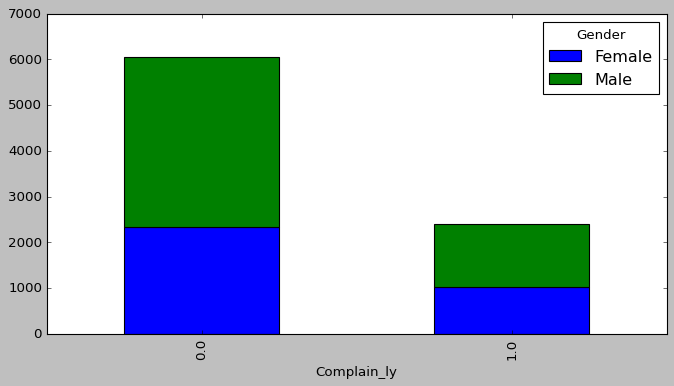

In [109]:
ct = pd.crosstab(df_cleaned['Complain_ly'],df_cleaned['Gender'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

<ipython-input-110-5c5945550d8f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Payment', y='City_Tier', data=df_cleaned, palette='coolwarm')


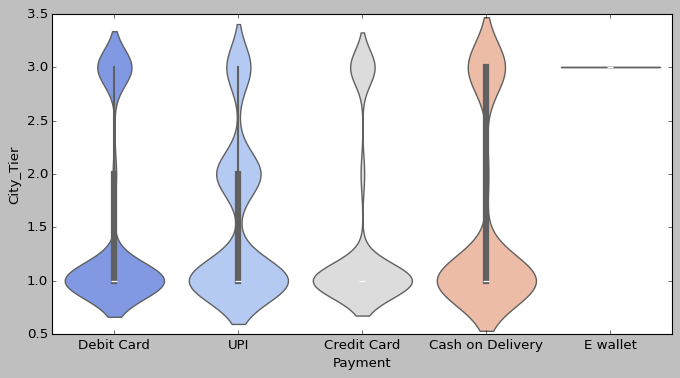

In [110]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Payment', y='City_Tier', data=df_cleaned, palette='coolwarm')
plt.show()

<ipython-input-111-474a84a26ef4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Payment', y='cashback', data=df_cleaned, palette='coolwarm')


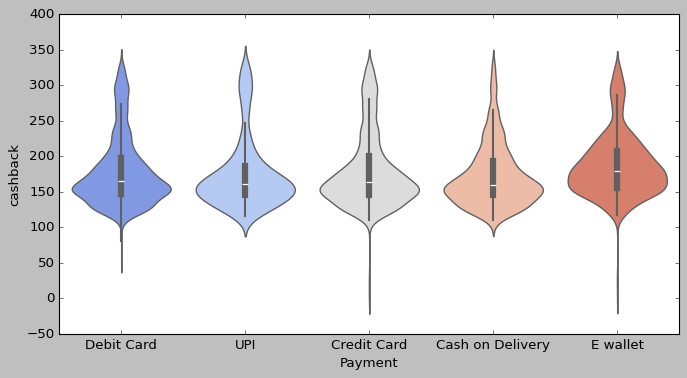

In [111]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Payment', y='cashback', data=df_cleaned, palette='coolwarm')
plt.show()

<ipython-input-112-e8997f64d9c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Payment', y='coupon_used_for_payment', data=df_cleaned, palette='coolwarm')


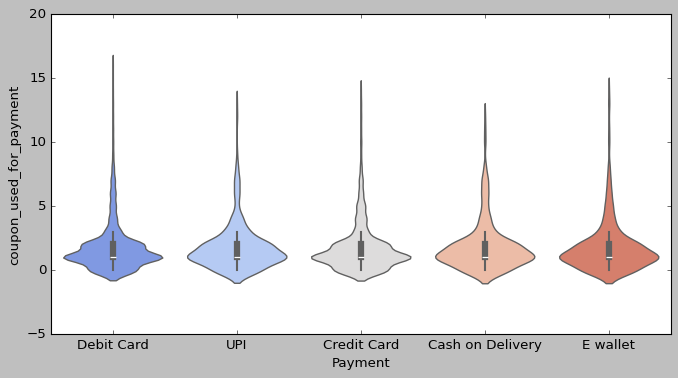

In [112]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Payment', y='coupon_used_for_payment', data=df_cleaned, palette='coolwarm')
plt.show()

<ipython-input-113-3598f962309c>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Marital_Status', y='rev_growth_yoy', data=df_cleaned, palette='coolwarm')


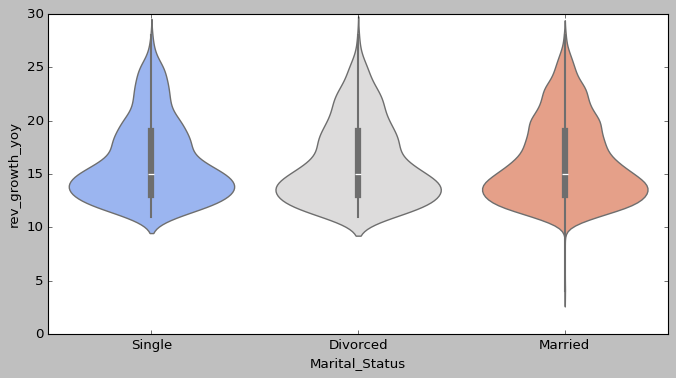

In [113]:
plt.figure(figsize=(10, 5))
sns.violinplot(x='Marital_Status', y='rev_growth_yoy', data=df_cleaned, palette='coolwarm')
plt.show()

<ipython-input-114-47ae53f97969>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='CC_Contacted_LY', y='Service_Score', data=df_cleaned, palette='coolwarm')


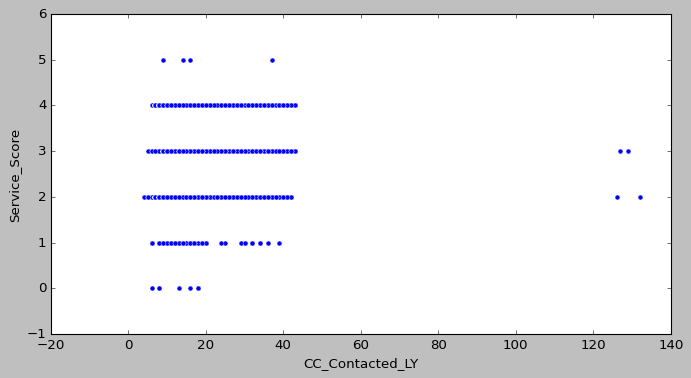

In [114]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CC_Contacted_LY', y='Service_Score', data=df_cleaned, palette='coolwarm')
plt.show()

<ipython-input-115-457d510d6b73>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x='CC_Contacted_LY', y='CC_Agent_Score', data=df_cleaned, palette='coolwarm')


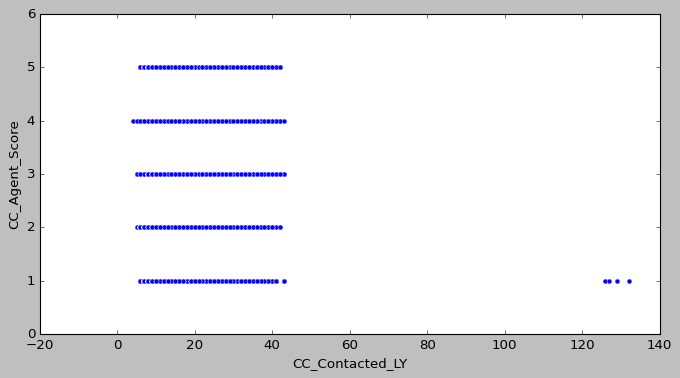

In [115]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='CC_Contacted_LY', y='CC_Agent_Score', data=df_cleaned, palette='coolwarm')
plt.show()

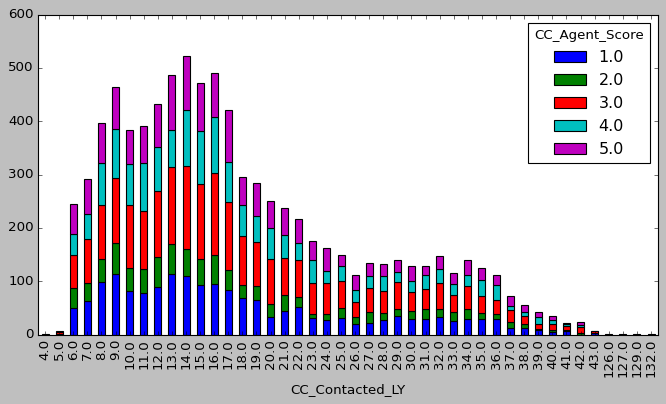

In [116]:
ct = pd.crosstab(df_cleaned['CC_Contacted_LY'],df_cleaned['CC_Agent_Score'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

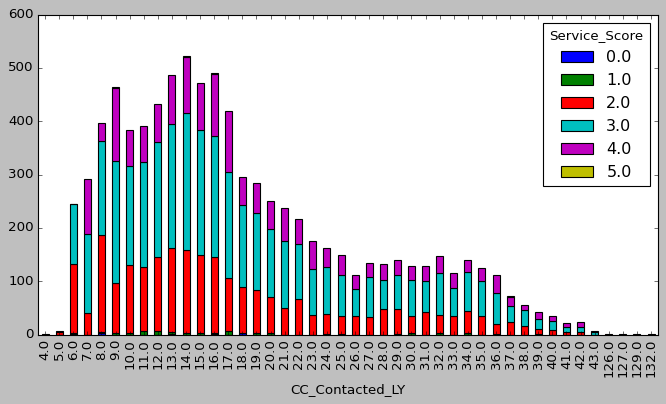

In [117]:
ct = pd.crosstab(df_cleaned['CC_Contacted_LY'],df_cleaned['Service_Score'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

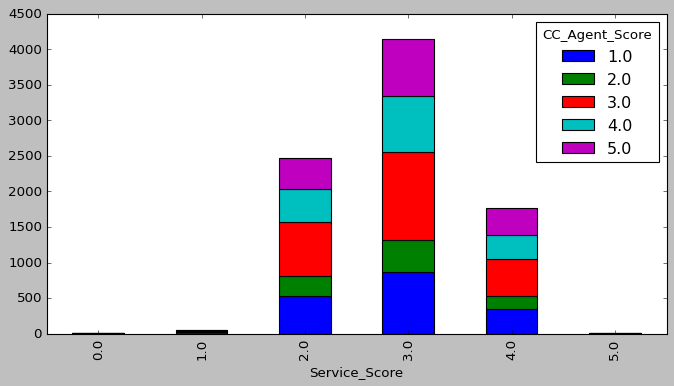

In [118]:
ct = pd.crosstab(df_cleaned['Service_Score'],df_cleaned['CC_Agent_Score'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

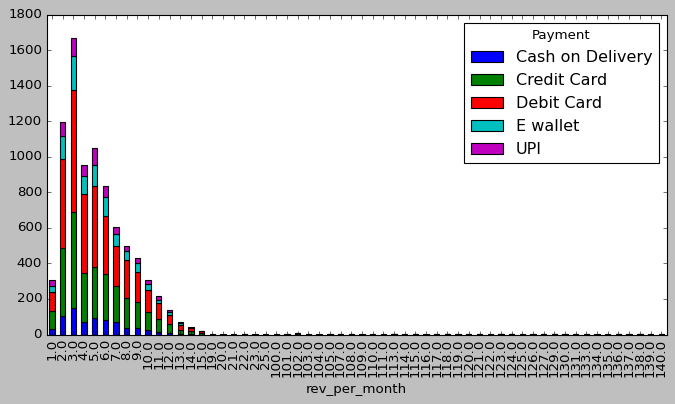

In [119]:
ct = pd.crosstab(df_cleaned['rev_per_month'],df_cleaned['Payment'], margins=True )
ct.drop('All',inplace = True)
ct.drop('All',axis = 1,inplace = True)
ct.plot.bar(stacked = True,figsize = (10,5))
plt.show()

###**Multivariate Analysis**

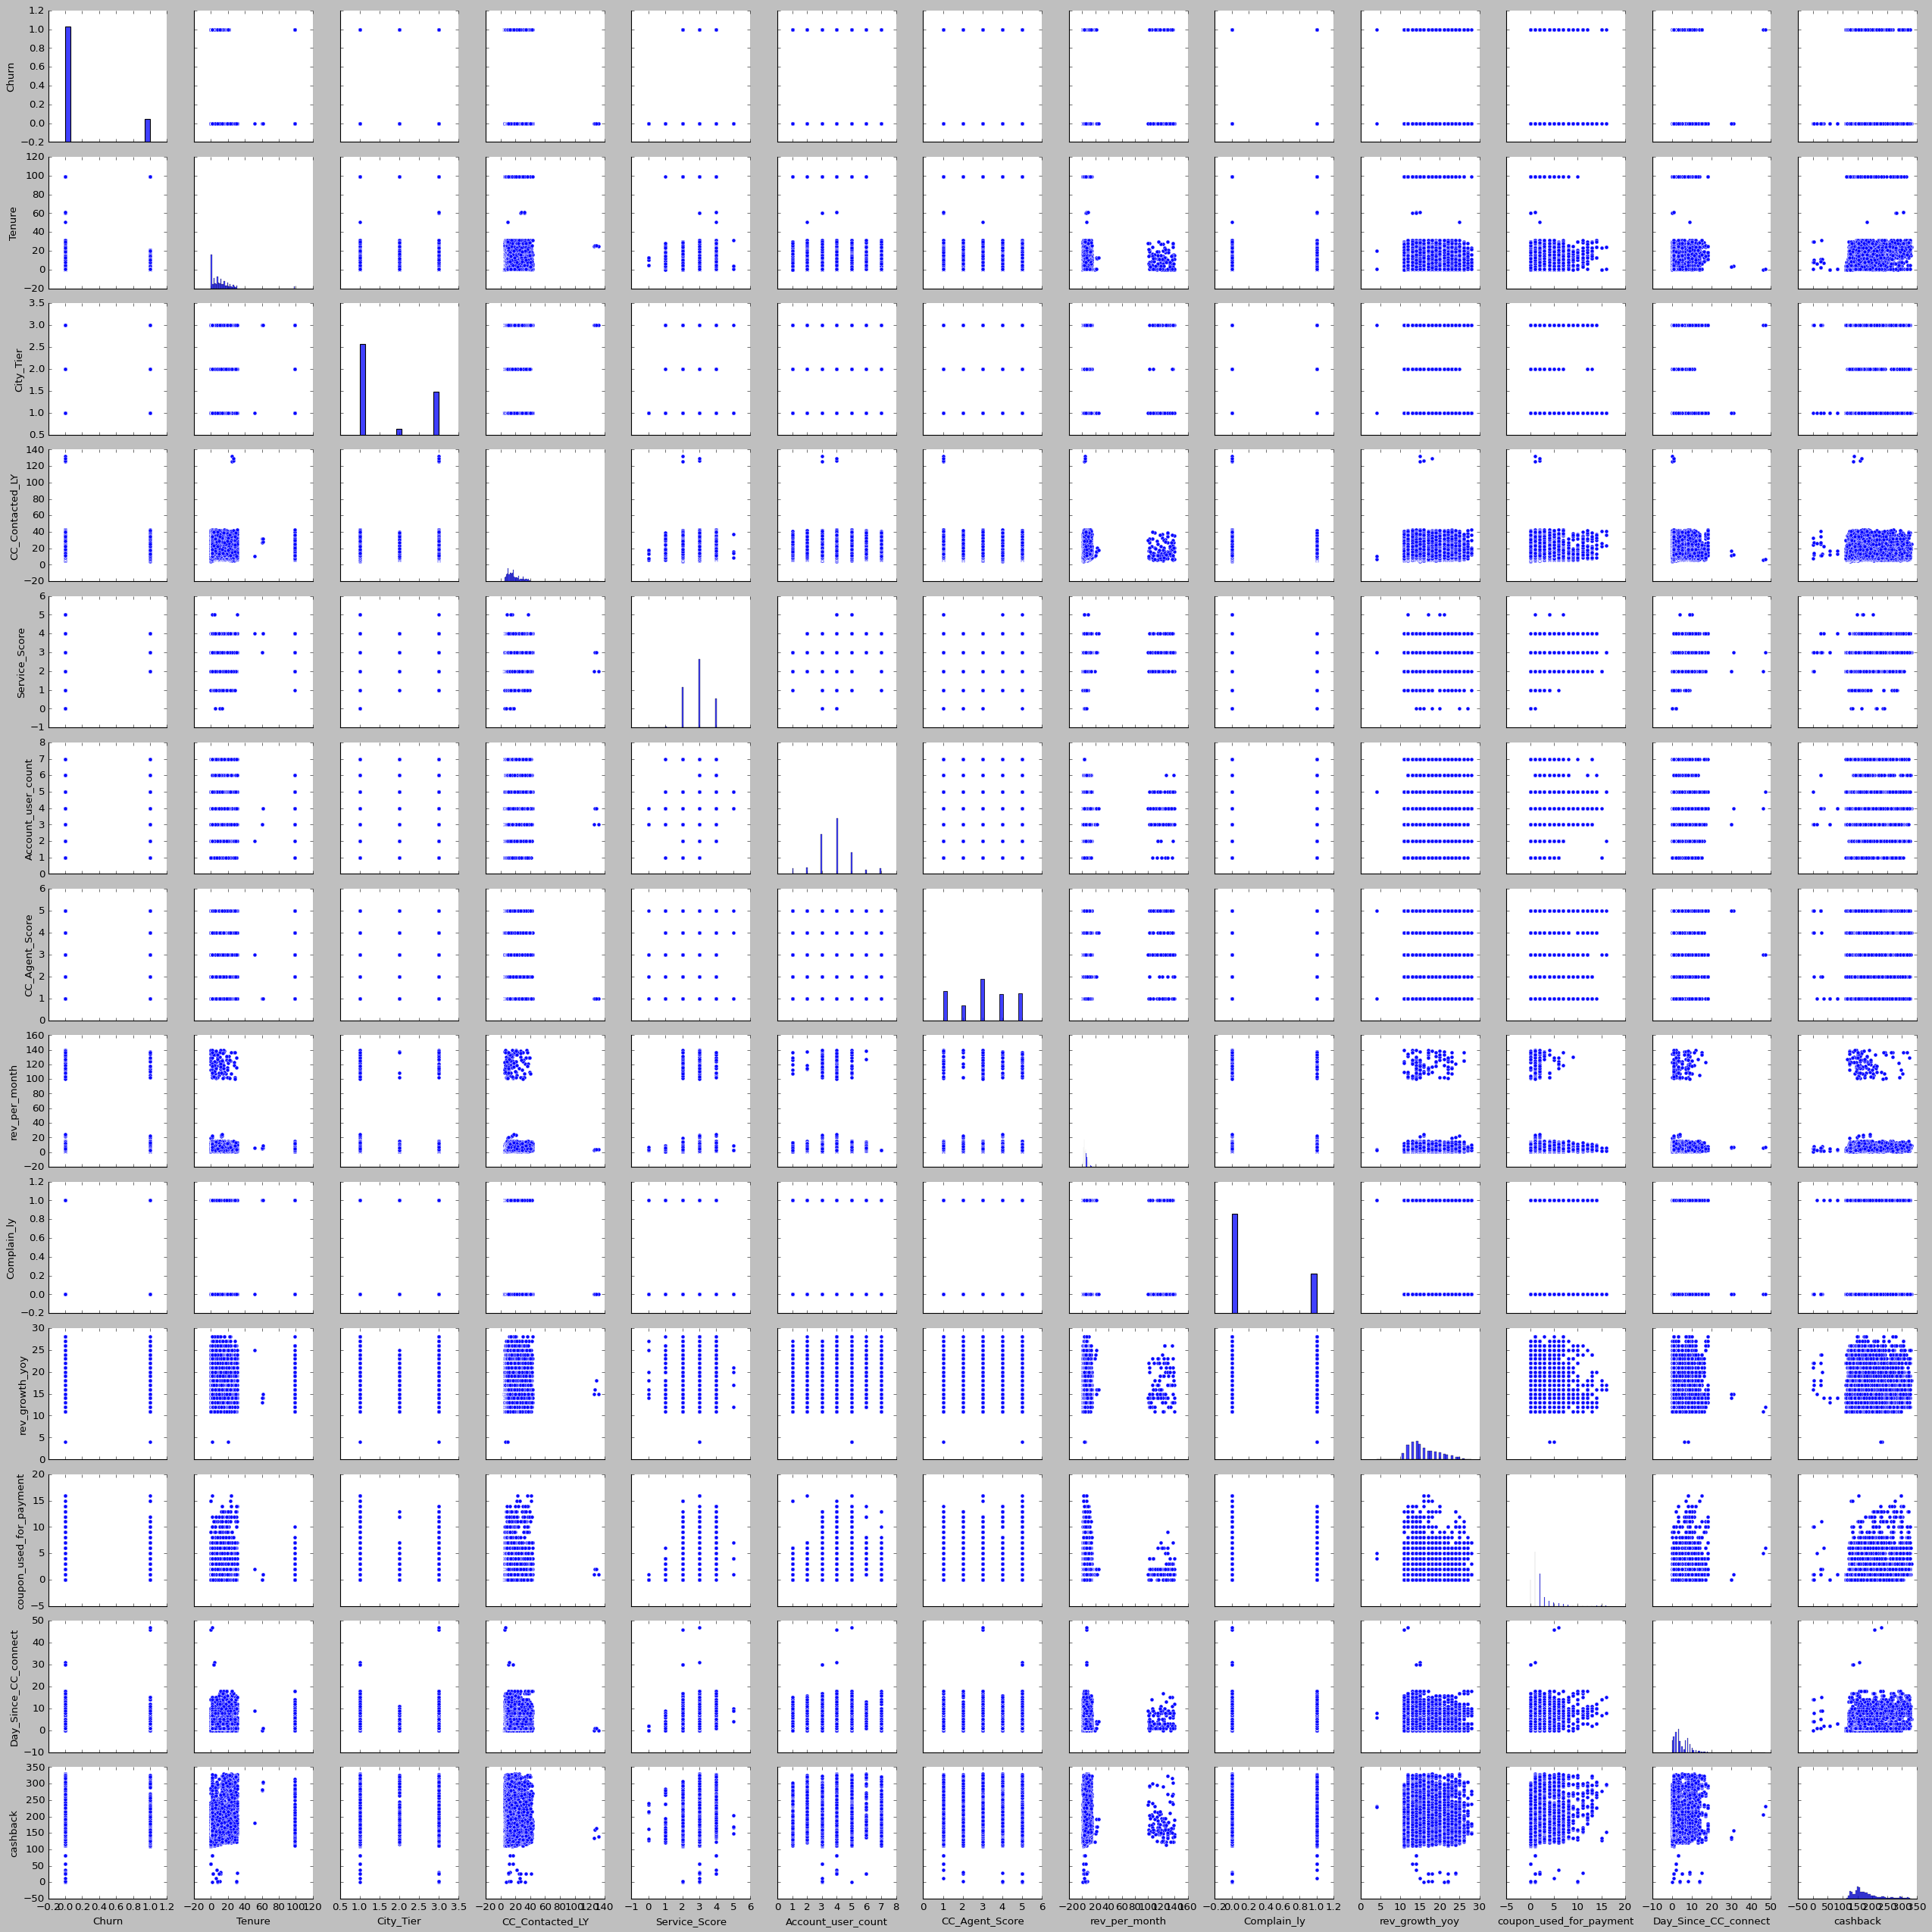

In [120]:
sns.pairplot(df_cleaned)

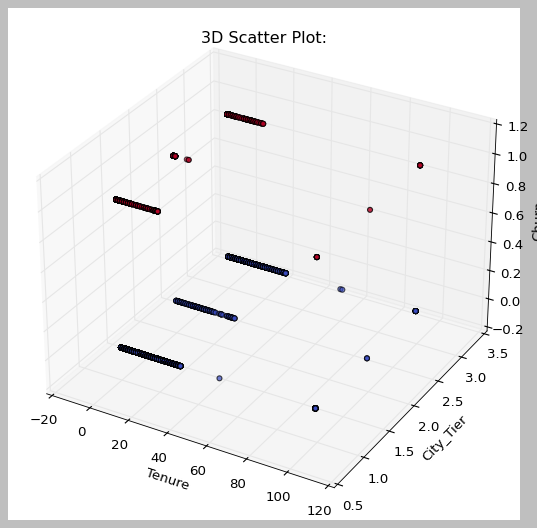

In [121]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cleaned['Tenure'], df_cleaned['City_Tier'], df_cleaned['Churn'], c=df_cleaned['Churn'], cmap='coolwarm')
ax.set_xlabel('Tenure')
ax.set_ylabel('City_Tier')
ax.set_zlabel('Churn')
ax.set_title("3D Scatter Plot:")

plt.show()

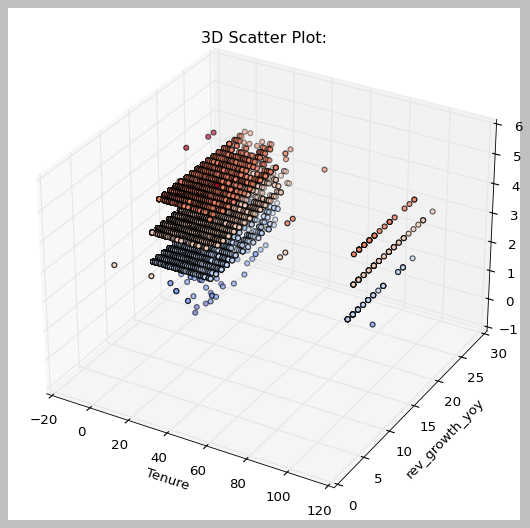

In [122]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cleaned['Tenure'], df_cleaned['rev_growth_yoy'], df_cleaned['Service_Score'], c=df_cleaned['Service_Score'], cmap='coolwarm')
ax.set_xlabel('Tenure')
ax.set_ylabel('rev_growth_yoy')
ax.set_zlabel('Service_Score')
ax.set_title("3D Scatter Plot:")

plt.show()

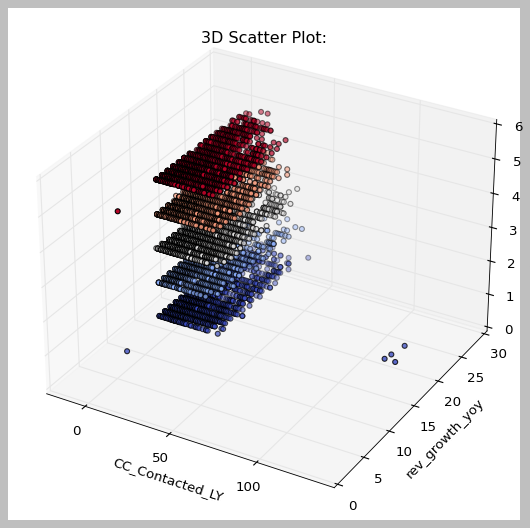

In [123]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cleaned['CC_Contacted_LY'], df_cleaned['rev_growth_yoy'], df_cleaned['CC_Agent_Score'], c=df_cleaned['CC_Agent_Score'], cmap='coolwarm')
ax.set_xlabel('CC_Contacted_LY')
ax.set_ylabel('rev_growth_yoy')
ax.set_zlabel('CC_Agent_Score')
ax.set_title("3D Scatter Plot:")

plt.show()

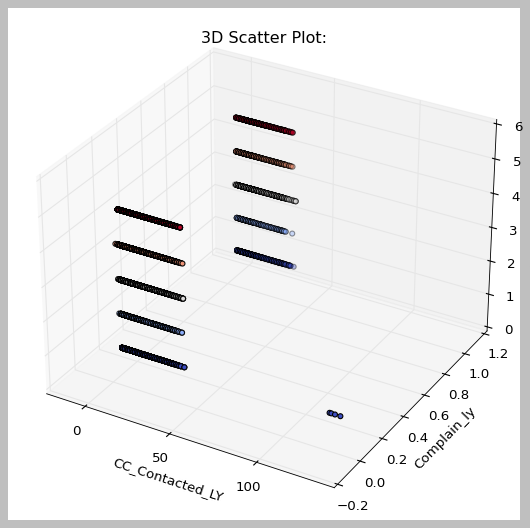

In [124]:
fig = plt.figure(figsize=(15,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_cleaned['CC_Contacted_LY'], df_cleaned['Complain_ly'], df_cleaned['CC_Agent_Score'], c=df_cleaned['CC_Agent_Score'], cmap='coolwarm')
ax.set_xlabel('CC_Contacted_LY')
ax.set_ylabel('Complain_ly')
ax.set_zlabel('CC_Agent_Score')
ax.set_title("3D Scatter Plot:")

plt.show()

<ipython-input-125-202a09e714d2>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_cleaned.pivot_table(values='rev_growth_yoy', index='Gender', columns=pd.cut(df_cleaned['Tenure'], bins=3), aggfunc='mean')


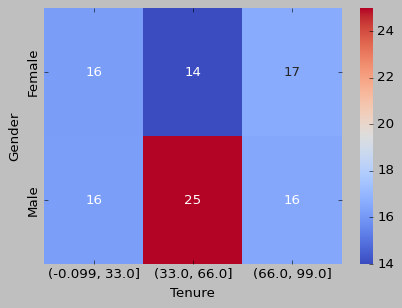

In [125]:
# Create a pivot table
pivot_table = df_cleaned.pivot_table(values='rev_growth_yoy', index='Gender', columns=pd.cut(df_cleaned['Tenure'], bins=3), aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f")
plt.show()


<ipython-input-126-e6baa8ba3b10>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = df_cleaned.pivot_table(values='rev_growth_yoy', index='account_segment', columns=pd.cut(df_cleaned['Service_Score'], bins=3), aggfunc='mean')


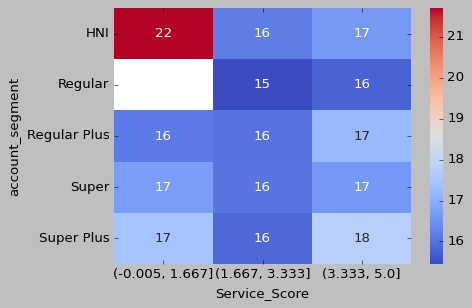

In [126]:
# Create a pivot table
pivot_table = df_cleaned.pivot_table(values='rev_growth_yoy', index='account_segment', columns=pd.cut(df_cleaned['Service_Score'], bins=3), aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(6,4))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm', fmt=".0f")
plt.show()

###**Outlier Treatment**

In [127]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    8447 non-null   int64  
 1   Tenure                   8447 non-null   float64
 2   City_Tier                8447 non-null   float64
 3   CC_Contacted_LY          8447 non-null   float64
 4   Payment                  8447 non-null   object 
 5   Gender                   8447 non-null   object 
 6   Service_Score            8447 non-null   float64
 7   Account_user_count       8447 non-null   float64
 8   account_segment          8447 non-null   object 
 9   CC_Agent_Score           8447 non-null   float64
 10  Marital_Status           8447 non-null   object 
 11  rev_per_month            8447 non-null   float64
 12  Complain_ly              8447 non-null   float64
 13  rev_growth_yoy           8447 non-null   int64  
 14  coupon_used_for_payment  844

In [128]:
df_cleaned['Churn'] = df_cleaned['Churn'].astype("object")

<ipython-input-128-b2dc7b9ca0a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Churn'] = df_cleaned['Churn'].astype("object")


In [129]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    8447 non-null   object 
 1   Tenure                   8447 non-null   float64
 2   City_Tier                8447 non-null   float64
 3   CC_Contacted_LY          8447 non-null   float64
 4   Payment                  8447 non-null   object 
 5   Gender                   8447 non-null   object 
 6   Service_Score            8447 non-null   float64
 7   Account_user_count       8447 non-null   float64
 8   account_segment          8447 non-null   object 
 9   CC_Agent_Score           8447 non-null   float64
 10  Marital_Status           8447 non-null   object 
 11  rev_per_month            8447 non-null   float64
 12  Complain_ly              8447 non-null   float64
 13  rev_growth_yoy           8447 non-null   int64  
 14  coupon_used_for_payment  844

In [130]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [131]:
for column in df_cleaned.columns:
    if df_cleaned[column].dtype != 'object':
         lower_range,upper_range = remove_outlier(df_cleaned[column])
         df_cleaned[column]=np.where(df_cleaned[column]>upper_range,upper_range,df_cleaned[column])
         df_cleaned[column]=np.where(df_cleaned[column]<lower_range,lower_range,df_cleaned[column])

<ipython-input-131-3ca600131318>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column]=np.where(df_cleaned[column]>upper_range,upper_range,df_cleaned[column])
<ipython-input-131-3ca600131318>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[column]=np.where(df_cleaned[column]<lower_range,lower_range,df_cleaned[column])


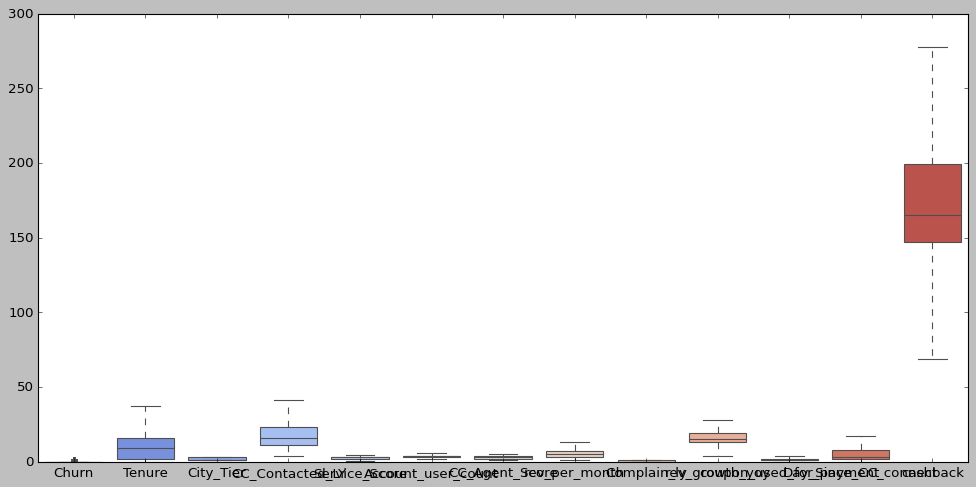

In [132]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_cleaned, palette="coolwarm")
plt.show()

In [133]:
df_cleaned.shape

(8447, 18)

In [134]:
df_cleaned['Churn'].value_counts()

Churn
0    7043
1    1404
Name: count, dtype: int64

In [135]:
df_cleaned['Churn'] = df_cleaned['Churn'].astype("int64")

<ipython-input-135-3fd97f597616>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Churn'] = df_cleaned['Churn'].astype("int64")


In [136]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8447 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    8447 non-null   int64  
 1   Tenure                   8447 non-null   float64
 2   City_Tier                8447 non-null   float64
 3   CC_Contacted_LY          8447 non-null   float64
 4   Payment                  8447 non-null   object 
 5   Gender                   8447 non-null   object 
 6   Service_Score            8447 non-null   float64
 7   Account_user_count       8447 non-null   float64
 8   account_segment          8447 non-null   object 
 9   CC_Agent_Score           8447 non-null   float64
 10  Marital_Status           8447 non-null   object 
 11  rev_per_month            8447 non-null   float64
 12  Complain_ly              8447 non-null   float64
 13  rev_growth_yoy           8447 non-null   float64
 14  coupon_used_for_payment  844

###**Splitting the Data into Train and Test**

In [151]:
cat=[] ## Identify categorical and numerical columns
num=[]
for i in df_cleaned.columns:
    if df_cleaned[i].dtype=="object":
        cat.append(i)
    else:
        num.append(i)
print(cat)
print(num)

['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']
['Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [152]:
# Copy all the predictor variables into X dataframe
X = df_cleaned.drop('Churn', axis=1)

# Copy target into the y dataframe.
y = df_cleaned['Churn']

In [153]:
# One-Hot Encode categorical variables
X_encoded = pd.get_dummies(X, columns=cat, drop_first=True)

In [154]:
# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42, stratify=y)

In [155]:
# Print dataset sizes
print("Training Set Size:", X_train.shape[0])
print("Testing Set Size:", X_test.shape[0])

Training Set Size: 5912
Testing Set Size: 2535


In [156]:
# Display the first few rows of the transformed dataset
print("\nEncoded Features:\n", X_train.head())


Encoded Features:
       Tenure  City_Tier  CC_Contacted_LY  Service_Score  Account_user_count  \
7112    12.0        3.0             14.0            2.0                 4.0   
9621    31.0        3.0             11.0            3.0                 4.0   
4629     1.0        3.0             18.0            3.0                 2.0   
4862     4.0        3.0             15.0            4.0                 4.0   
2857     4.0        3.0             12.0            3.0                 4.0   

      CC_Agent_Score  rev_per_month  Complain_ly  rev_growth_yoy  \
7112             3.0            6.0          0.0            15.0   
9621             4.0            6.0          0.0            24.0   
4629             3.0           10.0          0.0            13.0   
4862             3.0            7.0          0.0            12.0   
2857             2.0            4.0          0.0            13.0   

      coupon_used_for_payment  ...  Payment_UPI  Gender_Male  \
7112                      3.5  .

In [157]:
print(y_train.value_counts())  # Check class distribution in training set
print(y_test.value_counts())   # Check class distribution in testing set


Churn
0    4929
1     983
Name: count, dtype: int64
Churn
0    2114
1     421
Name: count, dtype: int64


###**Logistic Regression**

In [158]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression()
Log_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [159]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report

In [160]:
## Performance Matrix on train data set
y_train_predict = Log_model.predict(X_train)
model_score = Log_model.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

0.8795669824086604
[[4755  174]
 [ 538  445]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      4929
           1       0.72      0.45      0.56       983

    accuracy                           0.88      5912
   macro avg       0.81      0.71      0.74      5912
weighted avg       0.87      0.88      0.87      5912



In [161]:
## Performance Matrix on test data set
y_test_predict = Log_model.predict(X_test)
model_score = Log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

0.8800788954635108
[[2043   71]
 [ 233  188]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2114
           1       0.73      0.45      0.55       421

    accuracy                           0.88      2535
   macro avg       0.81      0.71      0.74      2535
weighted avg       0.87      0.88      0.87      2535



In [162]:
# Predict probabilities for the test set
y_probs_lr = Log_model.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_probs_lr)
# Calculate the AUC (Area Under the Curve)
roc_auc = metrics.auc(fpr, tpr)
print('AUC for the Test Data: %.3f' % roc_auc)

AUC for the Test Data: 0.877


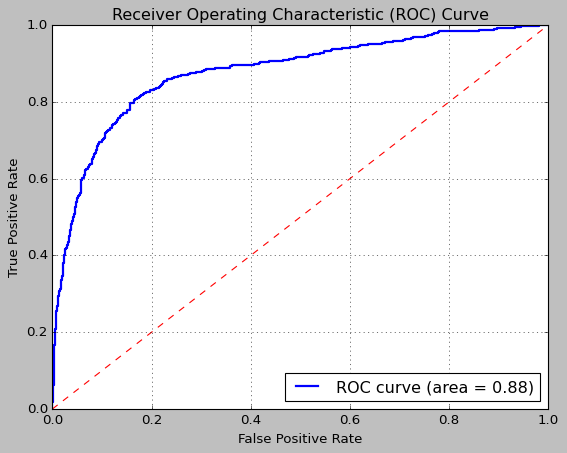

In [163]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [164]:
# Predict probabilities for the train set
y_probs_lr1 = Log_model.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_train, y_probs_lr1)
# Calculate the AUC (Area Under the Curve)
roc_auc1 = metrics.auc(fpr1, tpr1)
print('AUC for the Train Data: %.3f' % roc_auc1)

AUC for the Train Data: 0.868


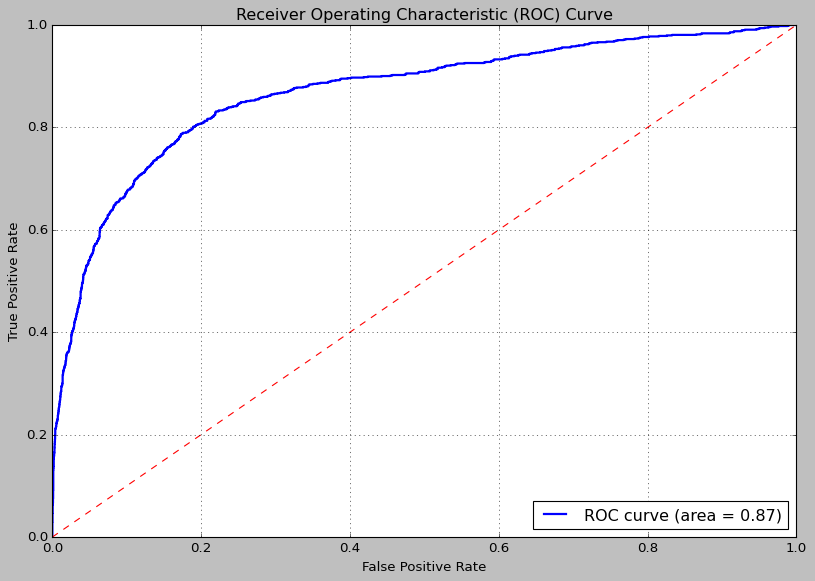

In [165]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'ROC curve (area = {roc_auc1:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Linear Discriminant Analysis**

In [174]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [175]:
clf = LinearDiscriminantAnalysis() ##Build LDA Model
lda_model=clf.fit(X_train,y_train)

In [176]:
## Performance Matrix on train data set
y_train_predict_lda = clf.predict(X_train)
model_score = clf.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_lda))
print(metrics.classification_report(y_train, y_train_predict_lda))

0.888700947225981
[[4800  129]
 [ 529  454]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.94      4929
           1       0.78      0.46      0.58       983

    accuracy                           0.89      5912
   macro avg       0.84      0.72      0.76      5912
weighted avg       0.88      0.89      0.88      5912



In [177]:
## Performance Matrix on test data set
y_test_predict_lda = clf.predict(X_test)
model_score = clf.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_lda))
print(metrics.classification_report(y_test, y_test_predict_lda))

0.886785009861933
[[2054   60]
 [ 227  194]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2114
           1       0.76      0.46      0.57       421

    accuracy                           0.89      2535
   macro avg       0.83      0.72      0.75      2535
weighted avg       0.88      0.89      0.87      2535



In [178]:
# Predict probabilities for the test set
y_probs_lda = clf.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr2, tpr2, thresholds2 = metrics.roc_curve(y_test, y_probs_lda)
# Calculate the AUC (Area Under the Curve)
roc_auc2 = metrics.auc(fpr2, tpr2)
print('AUC for the Test Data: %.3f' % roc_auc2)

AUC for the Test Data: 0.877


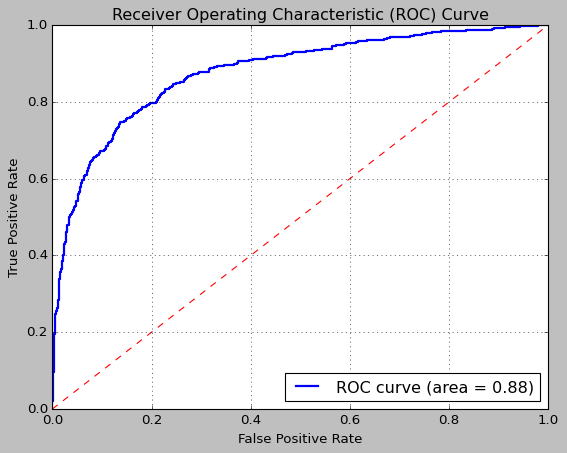

In [179]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr2, tpr2, color='blue', lw=2, label=f'ROC curve (area = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [180]:
# Predict probabilities for the train set
y_probs_lda1 = clf.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr3, tpr3, thresholds3 = metrics.roc_curve(y_train, y_probs_lda1)
# Calculate the AUC (Area Under the Curve)
roc_auc3 = metrics.auc(fpr3, tpr3)
print('AUC for the Train Data: %.3f' % roc_auc3)

AUC for the Train Data: 0.875


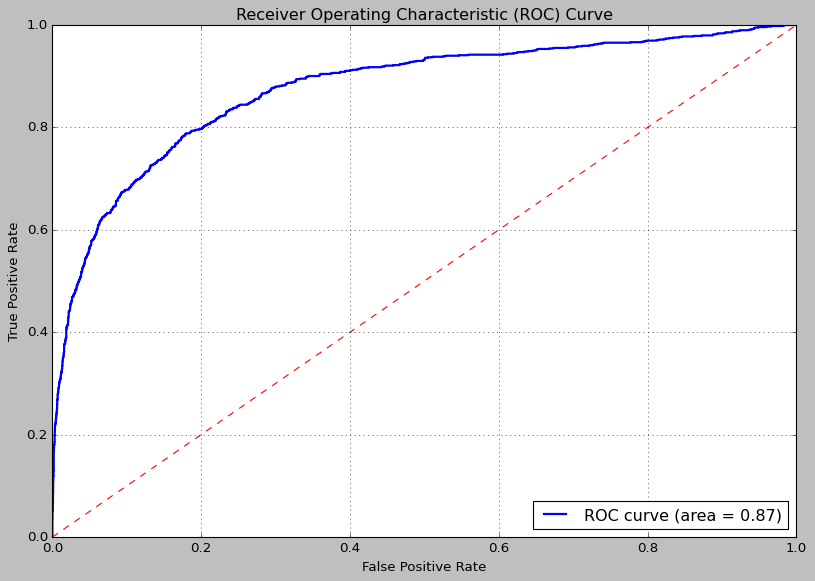

In [181]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr3, tpr3, color='blue', lw=2, label=f'ROC curve (area = {roc_auc3:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Decision Tree Classifier - CART Model**

In [182]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [183]:
dtc = DecisionTreeClassifier(criterion='gini', random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [184]:
## Performance Matrix on train data set
y_train_predict_dtc = dtc.predict(X_train)
model_score = dtc.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_dtc))
print(metrics.classification_report(y_train, y_train_predict_dtc))

1.0
[[4929    0]
 [   0  983]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4929
           1       1.00      1.00      1.00       983

    accuracy                           1.00      5912
   macro avg       1.00      1.00      1.00      5912
weighted avg       1.00      1.00      1.00      5912



In [185]:
## Performance Matrix on test data set
y_test_predict_dtc = dtc.predict(X_test)
model_score = dtc.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_dtc))
print(metrics.classification_report(y_test, y_test_predict_dtc))

0.9297830374753452
[[2016   98]
 [  80  341]]
              precision    recall  f1-score   support

           0       0.96      0.95      0.96      2114
           1       0.78      0.81      0.79       421

    accuracy                           0.93      2535
   macro avg       0.87      0.88      0.88      2535
weighted avg       0.93      0.93      0.93      2535



In [186]:
# Predict probabilities for the test set
y_probs_dtc = dtc.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr4, tpr4, thresholds4 = metrics.roc_curve(y_test, y_probs_dtc)
# Calculate the AUC (Area Under the Curve)
roc_auc4 = metrics.auc(fpr4, tpr4)
print('AUC for the Test Data: %.3f' % roc_auc4)

AUC for the Test Data: 0.882


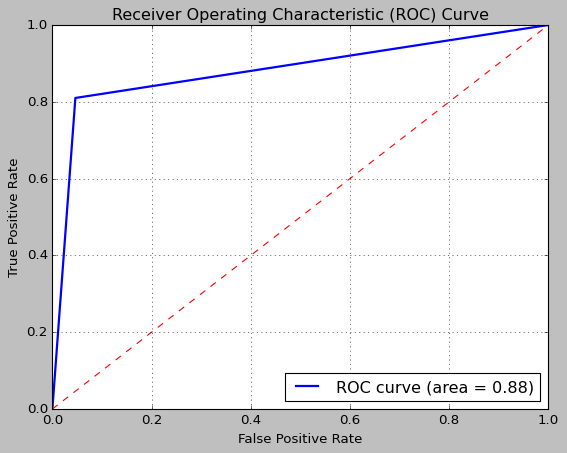

In [187]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr4, tpr4, color='blue', lw=2, label=f'ROC curve (area = {roc_auc4:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [188]:
# Predict probabilities for the train set
y_probs_dtc1 = dtc.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr5, tpr5, thresholds5 = metrics.roc_curve(y_train, y_probs_dtc1)
# Calculate the AUC (Area Under the Curve)
roc_auc5 = metrics.auc(fpr5, tpr5)
print('AUC for the Train Data: %.3f' % roc_auc5)

AUC for the Train Data: 1.000


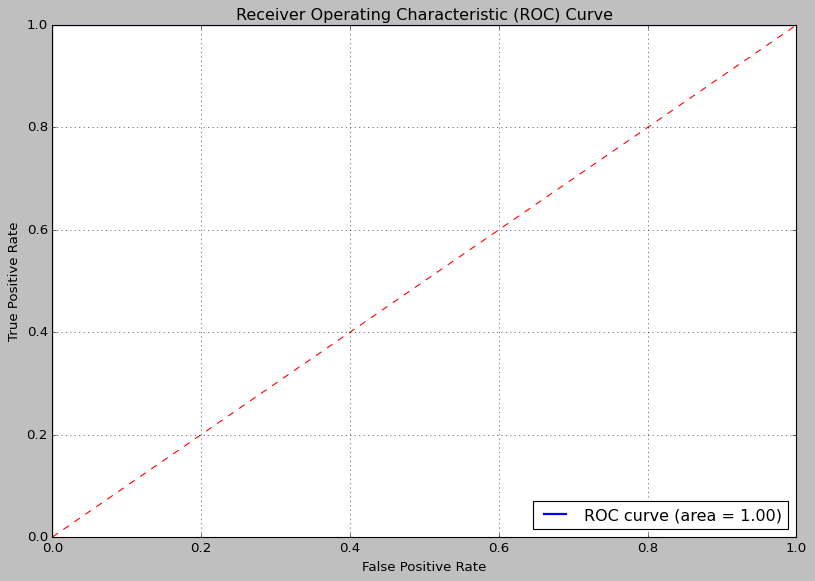

In [189]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr5, tpr5, color='blue', lw=2, label=f'ROC curve (area = {roc_auc5:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Naive Bayes Model**

In [190]:
from sklearn.naive_bayes import GaussianNB

In [191]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [192]:
## Performance Matrix on train data set
y_train_predict_gnb = gnb.predict(X_train)
model_score = gnb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gnb))
print(metrics.classification_report(y_train, y_train_predict_gnb))

0.7763870094722598
[[3897 1032]
 [ 290  693]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.85      4929
           1       0.40      0.70      0.51       983

    accuracy                           0.78      5912
   macro avg       0.67      0.75      0.68      5912
weighted avg       0.84      0.78      0.80      5912



In [193]:
## Performance Matrix on test data set
y_test_predict_gnb = gnb.predict(X_test)
model_score = gnb.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gnb))
print(metrics.classification_report(y_test, y_test_predict_gnb))

0.7869822485207101
[[1687  427]
 [ 113  308]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86      2114
           1       0.42      0.73      0.53       421

    accuracy                           0.79      2535
   macro avg       0.68      0.76      0.70      2535
weighted avg       0.85      0.79      0.81      2535



In [194]:
# Predict probabilities for the train set
y_probs_gnb1 = gnb.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr6, tpr6, thresholds6 = metrics.roc_curve(y_train, y_probs_gnb1)
# Calculate the AUC (Area Under the Curve)
roc_auc6 = metrics.auc(fpr6, tpr6)
print('AUC for the Train Data: %.3f' % roc_auc6)

AUC for the Train Data: 0.810


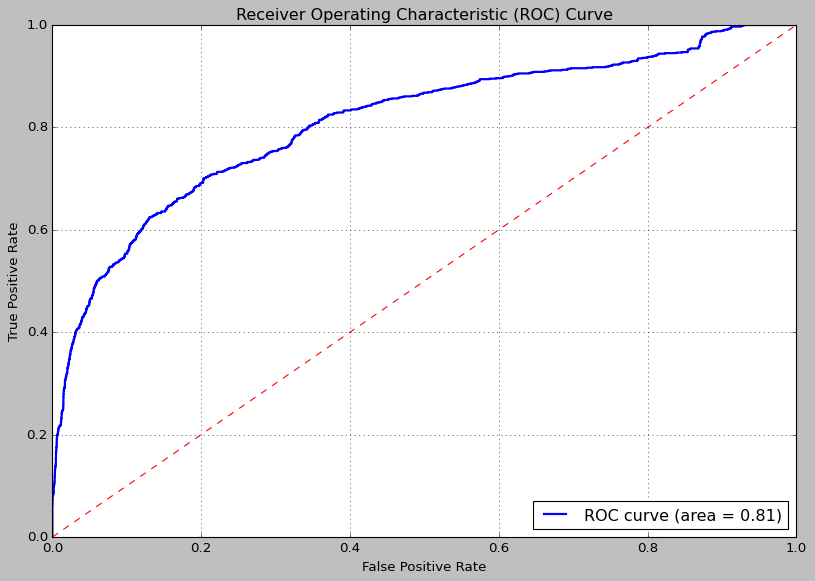

In [195]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr6, tpr6, color='blue', lw=2, label=f'ROC curve (area = {roc_auc6:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [196]:
# Predict probabilities for the test set
y_probs_gnb = gnb.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr7, tpr7, thresholds7 = metrics.roc_curve(y_test, y_probs_gnb)
# Calculate the AUC (Area Under the Curve)
roc_auc7 = metrics.auc(fpr7, tpr7)
print('AUC for the Test Data: %.3f' % roc_auc7)

AUC for the Test Data: 0.827


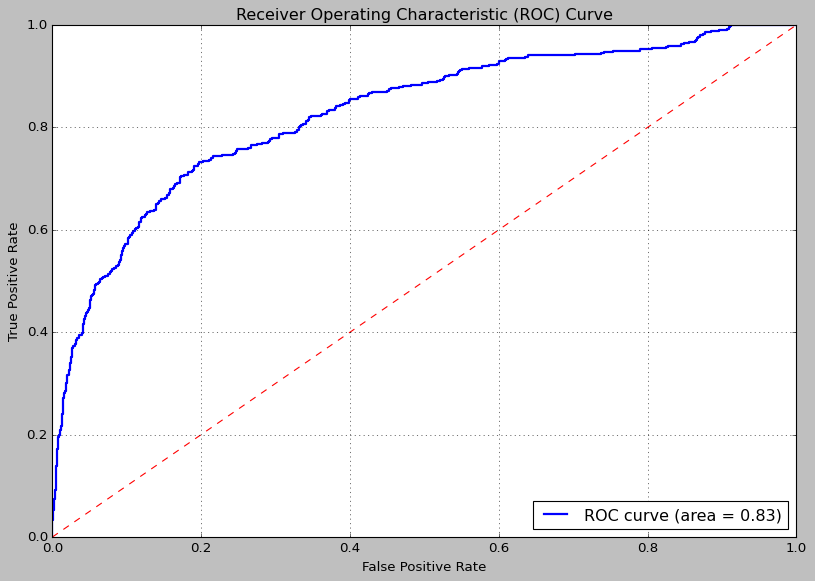

In [197]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr7, tpr7, color='blue', lw=2, label=f'ROC curve (area = {roc_auc7:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**KNN Model**

In [198]:
from sklearn.neighbors import KNeighborsClassifier

KNN =KNeighborsClassifier()
KNN.fit(X_train,y_train)

KNeighborsClassifier()

In [199]:
## Performance Matrix on train data set
y_train_predict_KNN = KNN.predict(X_train)
model_score = KNN.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_KNN))
print(metrics.classification_report(y_train, y_train_predict_KNN))

0.9211772665764547
[[4812  117]
 [ 349  634]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      4929
           1       0.84      0.64      0.73       983

    accuracy                           0.92      5912
   macro avg       0.89      0.81      0.84      5912
weighted avg       0.92      0.92      0.92      5912



In [200]:
## Performance Matrix on test data set
y_test_predict_KNN = KNN.predict(X_test)
model_score = KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_KNN))
print(metrics.classification_report(y_test, y_test_predict_KNN))

0.8741617357001973
[[2029   85]
 [ 234  187]]
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      2114
           1       0.69      0.44      0.54       421

    accuracy                           0.87      2535
   macro avg       0.79      0.70      0.73      2535
weighted avg       0.86      0.87      0.86      2535



In [201]:
# Predict probabilities for the train set
y_probs_KNN1 = KNN.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr8, tpr8, thresholds8 = metrics.roc_curve(y_train, y_probs_KNN1)
# Calculate the AUC (Area Under the Curve)
roc_auc8 = metrics.auc(fpr8, tpr8)
print('AUC for the Train Data: %.3f' % roc_auc8)

AUC for the Train Data: 0.962


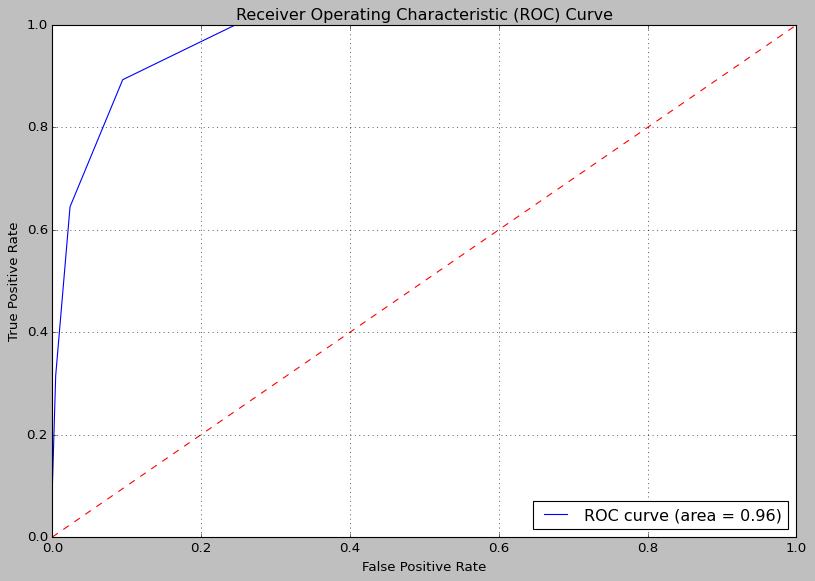

In [202]:
# Plot the ROC curve
plt.figure(figsize=(12, 8))
plt.plot(fpr8, tpr8, color='blue', lw=1, label=f'ROC curve (area = {roc_auc8:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [203]:
# Predict probabilities for the test set
y_probs_KNN = KNN.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr9, tpr9, thresholds9 = metrics.roc_curve(y_test, y_probs_KNN)
# Calculate the AUC (Area Under the Curve)
roc_auc9 = metrics.auc(fpr9, tpr9)
print('AUC for the Test Data: %.3f' % roc_auc9)

AUC for the Test Data: 0.868


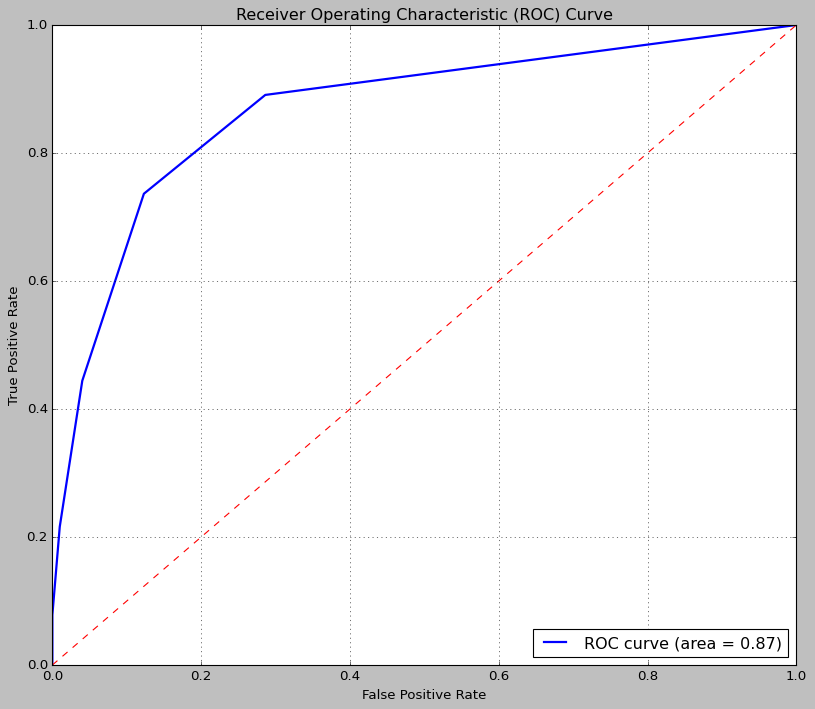

In [204]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr9, tpr9, color='blue', lw=2, label=f'ROC curve (area = {roc_auc9:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Random Forest Model**

In [205]:
from sklearn.ensemble import RandomForestClassifier

RF =RandomForestClassifier(n_estimators=100,random_state=1)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=1)

In [206]:
## Performance Matrix on train data set
y_train_predict_RF = RF.predict(X_train)
model_score = RF.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_RF))
print(metrics.classification_report(y_train, y_train_predict_RF))

1.0
[[4929    0]
 [   0  983]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4929
           1       1.00      1.00      1.00       983

    accuracy                           1.00      5912
   macro avg       1.00      1.00      1.00      5912
weighted avg       1.00      1.00      1.00      5912



In [207]:
## Performance Matrix on test data set
y_test_predict_RF = RF.predict(X_test)
model_score = RF.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_RF))
print(metrics.classification_report(y_test, y_test_predict_RF))

0.9621301775147929
[[2100   14]
 [  82  339]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98      2114
           1       0.96      0.81      0.88       421

    accuracy                           0.96      2535
   macro avg       0.96      0.90      0.93      2535
weighted avg       0.96      0.96      0.96      2535



In [208]:
# Predict probabilities for the train set
y_probs_RF1 = RF.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr10, tpr10, thresholds10 = metrics.roc_curve(y_train, y_probs_RF1)
# Calculate the AUC (Area Under the Curve)
roc_auc10 = metrics.auc(fpr10, tpr10)
print('AUC for the Train Data: %.3f' % roc_auc10)

AUC for the Train Data: 1.000


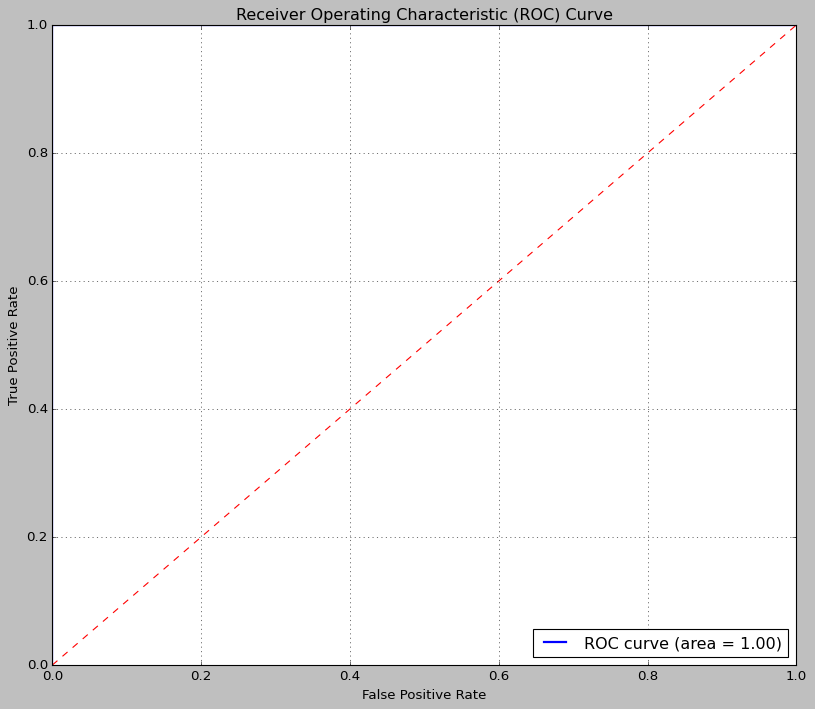

In [209]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr10, tpr10, color='blue', lw=2, label=f'ROC curve (area = {roc_auc10:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [210]:
# Predict probabilities for the test set
y_probs_RF = RF.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr11, tpr11, thresholds11 = metrics.roc_curve(y_test, y_probs_RF)
# Calculate the AUC (Area Under the Curve)
roc_auc11 = metrics.auc(fpr11, tpr11)
print('AUC for the Test Data: %.3f' % roc_auc11)

AUC for the Test Data: 0.990


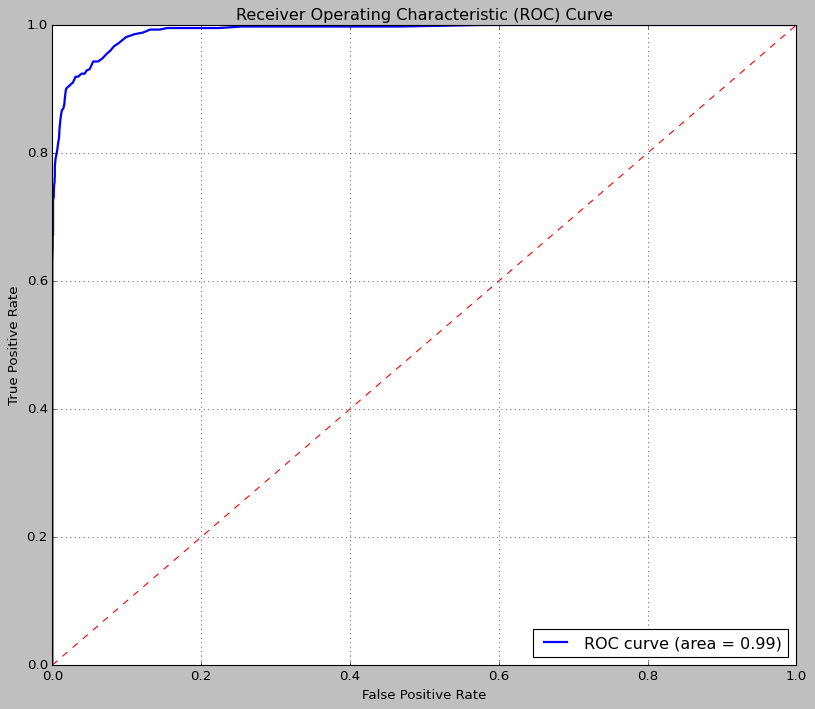

In [211]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr11, tpr11, color='blue', lw=2, label=f'ROC curve (area = {roc_auc11:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Boosting Classifier Model using Gradient Boost**

In [212]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [213]:
## Performance Matrix on train data set
y_train_predict_gb = gb.predict(X_train)
model_score = gb.score(X_train, y_train)
print(model_score)
print(metrics.confusion_matrix(y_train, y_train_predict_gb))
print(metrics.classification_report(y_train, y_train_predict_gb))

0.9235453315290933
[[4828  101]
 [ 351  632]]
              precision    recall  f1-score   support

           0       0.93      0.98      0.96      4929
           1       0.86      0.64      0.74       983

    accuracy                           0.92      5912
   macro avg       0.90      0.81      0.85      5912
weighted avg       0.92      0.92      0.92      5912



In [214]:
## Performance Matrix on test data set
y_test_predict_gb = gb.predict(X_test)
model_score = gb.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_test_predict_gb))
print(metrics.classification_report(y_test, y_test_predict_gb))

0.9108481262327416
[[2049   65]
 [ 161  260]]
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2114
           1       0.80      0.62      0.70       421

    accuracy                           0.91      2535
   macro avg       0.86      0.79      0.82      2535
weighted avg       0.91      0.91      0.91      2535



In [215]:
# Predict probabilities for the train set
y_probs_gb1 = gb.predict_proba(X_train)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr12, tpr12, thresholds12 = metrics.roc_curve(y_train, y_probs_gb1)
# Calculate the AUC (Area Under the Curve)
roc_auc12 = metrics.auc(fpr12, tpr12)
print('AUC for the Train Data: %.3f' % roc_auc12)

AUC for the Train Data: 0.954


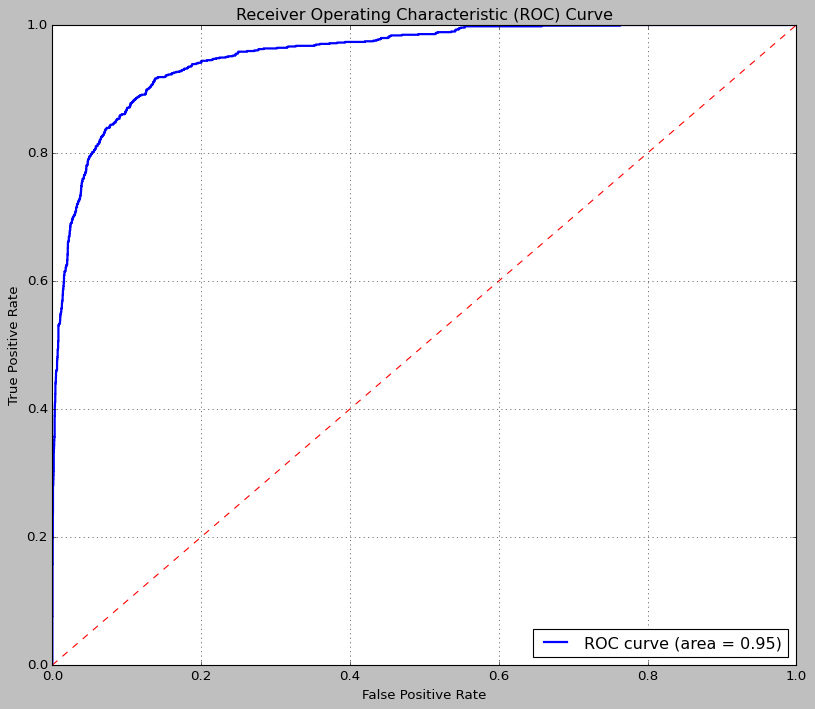

In [216]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr12, tpr12, color='blue', lw=2, label=f'ROC curve (area = {roc_auc12:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [217]:
# Predict probabilities for the test set
y_probs_gb = gb.predict_proba(X_test)[:, 1]
# Calculate FPR, TPR, and thresholds
fpr13, tpr13, thresholds13 = metrics.roc_curve(y_test, y_probs_gb)
# Calculate the AUC (Area Under the Curve)
roc_auc13 = metrics.auc(fpr13, tpr13)
print('AUC for the Test Data: %.3f' % roc_auc13)

AUC for the Test Data: 0.945


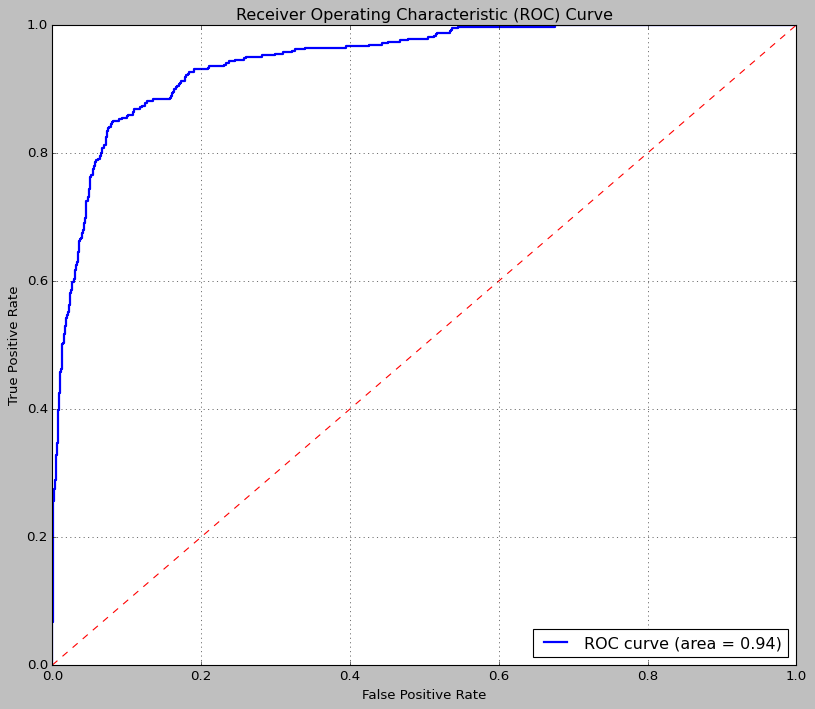

In [218]:
# Plot the ROC curve
plt.figure(figsize=(12, 10))
plt.plot(fpr13, tpr13, color='blue', lw=2, label=f'ROC curve (area = {roc_auc13:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Dashed diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

###**Insights**


**Logistic Regression Model**


1.   Accuracy for train Dataset - 88%
2.   Accuracy for test Dataset - 88%
4.   Recall for train Dataset - 45%
5. Recall for test Dataset - 45%
6.  AUC for train Dataset - 87%
7. AUC for test Dataset - 88%


**Linear Discriminant Analysis**


1.   Accuracy for train Dataset - 89%
3.   Accuracy for test Dataset - 89%
4.   Recall for train Dataset - 46%
5. Recall for test Dataset - 46%
6.  AUC for train Dataset - 87%
7. AUC for test Dataset - 88%


**Decision Tree Classifier - CART Model**

1.   Accuracy for train Dataset - 100%
2.   Accuracy for test Dataset - 93%
5.   Recall for train Dataset - 100%
6. Recall for test Dataset - 81%
7.  AUC for train Dataset - 100%
8. AUC for test Dataset - 88%



**Naive Bayes Model**

1.   Accuracy for train Dataset - 78%
2.   Accuracy for test Dataset - 79%
5.   Recall for train Dataset - 70%
6. Recall for test Dataset - 73%
7.  AUC for train Dataset - 81%
8. AUC for test Dataset - 82%

**KNN Model**

1.   Accuracy for train Dataset - 92%
2.   Accuracy for test Dataset - 87%
5.   Recall for train Dataset - 64%
6. Recall for test Dataset - 44%
7.  AUC for train Dataset - 96%
8. AUC for test Dataset - 87%

**Random Forest Model**

1.   Accuracy for train Dataset - 100%
2.   Accuracy for test Dataset - 96%
5.   Recall for train Dataset - 100%
6. Recall for test Dataset - 81%
7.  AUC for train Dataset - 100%
8. AUC for test Dataset - 99%

**Boosting Classifier Model using Gradient Boost**

1.   Accuracy for train Dataset - 92%
2.   Accuracy for test Dataset - 91%
5.   Recall for train Dataset - 64%
6. Recall for test Dataset - 62%
7.  AUC for train Dataset - 95%
8. AUC for test Dataset - 94%

As we compare all the seven models build for this dataset, we find that the best performing model is Random Forest Model with 100% and 96% accuracy for Training and Testing Data respectively which is fairly the best followed by Decision Tree model with the model score 100% and 93% for Training and Testing Data respectively. The recall Values for both the models are same that is 100% and 81% for training and testing data. However the precision and the  AUC score for Random Forest Model is slightly better than the Decision Tree Model. Hence, I choose to go with Random Forest model for our outcome in this Dataset.

Gradient Boost is also a good model with Accuracy 92% overall. The recall value and the precision value for the model is average. AUC score however is fairly good that is 95%.

The other three models KNN model, LDA and Logistic Regression are average performing models to which we can apply SMOTE to check if their efficiency increases.

Naive Bayes Model is the worst performing model for this Dataset.

###**Important Features**

In [219]:
feature_importance = RF.feature_importances_
print(feature_importance)

[0.22616189 0.02735783 0.06687487 0.02106415 0.03638628 0.05690154
 0.0580576  0.07031685 0.0608489  0.03006647 0.0666587  0.08607748
 0.02039263 0.01521687 0.01370039 0.00831949 0.02148512 0.00360778
 0.02197637 0.01506347 0.00407971 0.01824014 0.02716422 0.02104833
 0.00293294]


In [220]:
features = X_encoded.columns
print(features)

Index(['Tenure', 'City_Tier', 'CC_Contacted_LY', 'Service_Score',
       'Account_user_count', 'CC_Agent_Score', 'rev_per_month', 'Complain_ly',
       'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect',
       'cashback', 'Payment_Credit Card', 'Payment_Debit Card',
       'Payment_E wallet', 'Payment_UPI', 'Gender_Male',
       'account_segment_Regular', 'account_segment_Regular Plus',
       'account_segment_Super', 'account_segment_Super Plus',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Login_device_Mobile', 'Login_device_Others'],
      dtype='object')


In [221]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(importance_df)

                         Feature  Importance
0                         Tenure    0.226162
11                      cashback    0.086077
7                    Complain_ly    0.070317
2                CC_Contacted_LY    0.066875
10          Day_Since_CC_connect    0.066659
8                 rev_growth_yoy    0.060849
6                  rev_per_month    0.058058
5                 CC_Agent_Score    0.056902
4             Account_user_count    0.036386
9        coupon_used_for_payment    0.030066
1                      City_Tier    0.027358
22         Marital_Status_Single    0.027164
18  account_segment_Regular Plus    0.021976
16                   Gender_Male    0.021485
3                  Service_Score    0.021064
23           Login_device_Mobile    0.021048
12           Payment_Credit Card    0.020393
21        Marital_Status_Married    0.018240
13            Payment_Debit Card    0.015217
19         account_segment_Super    0.015063
14              Payment_E wallet    0.013700
15        

Tenurity of the account, Monthly average cashback generated by account, Any Complaints raised by the account in last 12 months and the number of times all the customer of the account contacted customer care in the last 12 months are some of the most important features to be closely and deeply looking at.  

The Customers are definitely not very happy with the services provided by the company. It is the major concern and needs to be worked on in order to stop the customers from leaving the product and services.

###**Scaling and Clustering and Binning the Category**

In [222]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

In [229]:
# Separate features and target
X1 = df_cleaned[cat + num]  # Features
y1 = df_cleaned['Churn']  # Target

In [230]:
# Preprocessing: One-Hot Encoding for categorical & Scaling for numerical
preprocessor = ColumnTransformer([
    ('numerical', StandardScaler(), num),
    ('categorical', OneHotEncoder(handle_unknown='ignore'), cat)
])

In [231]:
# Apply KMeans with the chosen number of clusters (e.g., 4 based on the elbow plot)
optimal_clusters = 3
kmeans = make_pipeline(preprocessor, KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10))


In [235]:
# Fit the pipeline and predict clusters
cluster_labels = kmeans.fit_predict(X1)

X1['Cluster'] = cluster_labels


In [236]:
# Analyze cluster distribution with respect to churn
cluster_churn = pd.crosstab(X1['Cluster'], y1)
print(cluster_churn)

Churn       0     1
Cluster            
0        4037     0
1        3006    73
2           0  1331


In [239]:
bin_labels = ['Low', 'Medium', 'High']  # Adjust labels based on the number of clusters
X1['Binned_Category'] = pd.Categorical.from_codes(X1['Cluster'], categories=bin_labels)


In [240]:
print(X1[['Tenure', 'Binned_Category']].head())


   Tenure Binned_Category
0     4.0            High
1     0.0            High
3     0.0            High
4     0.0            High
6     2.0            High


###**A/B Testing/Chi-Square Test**

In [241]:
from scipy.stats import chi2_contingency

In [246]:
# Create a contingency table
contingency_table = pd.crosstab(X1['Gender'], X1['Churn'])
print(contingency_table)

Churn      0    1
Gender           
Female  2854  492
Male    4189  912


In [245]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 14.466848325040061
p-value: 0.00014264811370943775


In [248]:
# Create a contingency table
contingency_table1 = pd.crosstab(X1['Tenure'], X1['Churn'])

In [254]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table1)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 2281.0397505268957
p-value: 0.0


p-value (p): A small p-value (≤ 0.05) suggests a significant association between the feature and the target variable. Hence Gender and Tenure has significant association.

In [252]:
# Create a contingency table
contingency_table2 = pd.crosstab(X1['cashback'], X1['Churn'])

In [255]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table2)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 6398.527348391878
p-value: 8.403420646403342e-63


In [256]:
# Create a contingency table
contingency_table3 = pd.crosstab(X1['Complain_ly'], X1['Churn'])

In [257]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table3)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 552.3356314437948
p-value: 3.90748504118174e-122


In [258]:

# Create a contingency table
contingency_table4 = pd.crosstab(X1['CC_Contacted_LY'], X1['Churn'])

In [259]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table4)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 86.68564468880982
p-value: 7.266600008548533e-06


In [260]:
# Create a contingency table
contingency_table5 = pd.crosstab(X1['Day_Since_CC_connect'], X1['Churn'])

In [261]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table5)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 367.1353151767489
p-value: 1.339273162037841e-67


In [262]:
# Create a contingency table
contingency_table6 = pd.crosstab(X1['rev_growth_yoy'], X1['Churn'])

In [263]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table6)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 46.770537434932926
p-value: 0.00022879550820713144


In [264]:
# Create a contingency table
contingency_table7 = pd.crosstab(X1['rev_per_month'], X1['Churn'])

In [265]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table7)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 30.61031670728644
p-value: 0.0022580929223283584


Revenue growth percentage of the account and Monthly average revenue generated by account has significant association with churning of the customers.

In [266]:
# Create a contingency table
contingency_table8 = pd.crosstab(X1['CC_Agent_Score'], X1['Churn'])

In [267]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table8)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 91.20074301571648
p-value: 7.318122254088049e-19


In [268]:
# Create a contingency table
contingency_table9 = pd.crosstab(X1['Account_user_count'], X1['Churn'])

In [269]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table9)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 66.31756600755392
p-value: 5.971441115848966e-13


In [275]:
# Create a contingency table
contingency_table10 = pd.crosstab(X1['Payment'], X1['Churn'])

In [276]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table10)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 92.0185353958733
p-value: 4.904699544927233e-19


In [277]:
# Create a contingency table
contingency_table11 = pd.crosstab(X1['account_segment'], X1['Churn'])

In [278]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table11)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 402.09999047853427
p-value: 9.784875979189804e-86


In [279]:
# Create a contingency table
contingency_table12 = pd.crosstab(X1['Marital_Status'], X1['Churn'])

In [280]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table12)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 306.5803785658673
p-value: 2.6724935425805962e-67


In [281]:
# Create a contingency table
contingency_table13 = pd.crosstab(X1['Login_device'], X1['Churn'])

In [282]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table13)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 20.552321266009244
p-value: 3.444452038821381e-05


In [283]:
# Create a contingency table
contingency_table14 = pd.crosstab(X1['City_Tier'], X1['Churn'])

In [284]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table14)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 73.61143945867676
p-value: 1.036284539926947e-16


In [274]:
print(X1.columns)


Index(['Payment', 'Gender', 'account_segment', 'Marital_Status',
       'Login_device', 'Churn', 'Tenure', 'City_Tier', 'CC_Contacted_LY',
       'Service_Score', 'Account_user_count', 'CC_Agent_Score',
       'rev_per_month', 'Complain_ly', 'rev_growth_yoy',
       'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback',
       'Cluster', 'Binned_Category'],
      dtype='object')


In [285]:
# Create a contingency table
contingency_table15 = pd.crosstab(X1['Service_Score'], X1['Churn'])

In [286]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table15)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 13.93296196727135
p-value: 0.016040905033782953


In [287]:
# Create a contingency table
contingency_table16 = pd.crosstab(X1['coupon_used_for_payment'], X1['Churn'])

In [288]:
# Perform the Chi-Square test
chi2, p, dof, expected = chi2_contingency(contingency_table16)

print(f'Chi-Square Statistic: {chi2}')
print(f'p-value: {p}')

Chi-Square Statistic: 8.27150487598257
p-value: 0.08212391005132286


Service score and coupon used for payment also impacts our target variable significantly.